## **FINAL PROJECT 3 - ENSEMBLE METHOD**

## **KELOMPOK 7**

Our Members:

a. Nama: Minan Abdillah ID: PYTN-KS16-010

b. Michael Vincent Efren Malomo ID: PYTN-KS16-016

c. Muhammad Danu Prasetia ID: PYTN-KS16-020

PROJECT OVERVIEW

Dataset yang digunakan pada projek ini adalah dataset publik yang tersedia diwebsite kaggle. Dataset ini berisi informasi mengenai record data pasien yang memiliki masalah dengan jantung mereka, dataset ini dapat digunakan untuk memprediksi apakah pasien akan mengalami kegagalan jantung atau tidak. Tujuan utama dari projek ini adalah membuat model untuk memprediksi kematian akibat gagal jantung menggunakan konsep Classification dengan ensemble Model. Algoritma yang dipilih pada pengerjaan projek ini adalah algoritma Random Forest. Random Forest merupakan algoritma yang menerapkan metode ensemble dari algoritma decision tree. Selain itu sebelum ke tujuan utama diperlukan beberapa proses seperti data cleaning, eksplorasi data, dan data preprocessing untuk memproses dataset agar siap dan dapat menghasilkan model klasifikasi yang optimal. Dataset ini memiliki dimensi sebesar 299 rows × 13 columns dengan semua fitur/kolom bertipe data numeric/continuous.

ABOUT DATASET:
* age - umur pasien
* anemia - apakah ada pengurangan hemoglobin
* creatinine_phosphokinase - level enzim CPK dalam mcg/L
* diabetes - apakah pasien punya riwayat diabetes di setiap kontraksi jantung
* ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
* high_blood_pressure - apakah pasien punya darah tinggi
* platelets - jumlah platelet di darah dalam kiloplatelets/mL
* serum_creatinine - level serum creatinine di darah dalam mg/dL
* serum_sodium - level serum sodium di darah dalam mEq/L
* sex - apakah pasien pria atau wanita
* smoking - apakah pasien merokok
* time - waktu dalam hari
* DEATH_EVENT - apakah pasien sudah meninggal

### **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

### **LOAD DATA**

In [ ]:
df = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

In [ ]:
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [ ]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


disini kami Memisahkan Data pada dua variable yakni X dan Y dimana Variable X itu merupakan feature yang berisi data "age", "anemia", dll yang dapat memengaruhi variabel Y yang dimana Y itu berisi feature "DEATH EVENT".

In [ ]:
y = df["DEATH_EVENT"]
X =  df.drop("DEATH_EVENT", axis = 1)

In [ ]:
X

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  
0          0     4  
1          0     6  
2          1     7  
3          0     7  
4          0     8  
..       ...   ...  
294        1   270  
295        0   271  
296        0   278  
297        1   280  
298        1   285  

[299 rows x 12 columns]

pada variable X berisi semua feature kecuali Death Event

In [ ]:
X.shape

(299, 12)

pada variabel Y hanya berisi satu feature yaitu death event

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

### **SPLITTING DATA**

Pada Bagian ini, kami melakukan splitting data untuk membagi data menjadi data test dan data training dengan perbandingan 90:10 yang dimana data training yang digunakan sebesar 90 persen dari data yang ada dan 10 persen data digunakan untuk testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=45)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 225 to 131
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       269 non-null    float64
 1   anaemia                   269 non-null    int64  
 2   creatinine_phosphokinase  269 non-null    int64  
 3   diabetes                  269 non-null    int64  
 4   ejection_fraction         269 non-null    int64  
 5   high_blood_pressure       269 non-null    int64  
 6   platelets                 269 non-null    float64
 7   serum_creatinine          269 non-null    float64
 8   serum_sodium              269 non-null    int64  
 9   sex                       269 non-null    int64  
 10  smoking                   269 non-null    int64  
 11  time                      269 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 27.3 KB


In [ ]:
X_train

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
225  75.0        0                       675         1                 60   
138  62.0        0                       281         1                 35   
156  52.0        1                        58         0                 35   
69   65.0        0                       113         1                 25   
205  50.0        1                       167         1                 45   
..    ...      ...                       ...       ...                ...   
163  50.0        1                      2334         1                 35   
213  48.0        1                       131         1                 30   
95   58.0        1                       133         0                 60   
32   50.0        1                       249         1                 35   
131  60.0        1                      1082         1                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
225                    0   265000.0              1.40           125    0   
138                    0   221000.0              1.00           136    0   
156                    0   277000.0              1.40           136    0   
69                     0   497000.0              1.83           135    1   
205                    0   362000.0              1.00           136    0   
..                   ...        ...               ...           ...  ...   
163                    0    75000.0              0.90           142    0   
213                    1   244000.0              1.60           130    0   
95                     1   219000.0              1.00           141    1   
32                     1   319000.0              1.00           128    0   
131                    0   250000.0              6.10           131    1   

     smoking  time  
225        0   205  
138        0   108  
156        0   120  
69         0    67  
205        0   187  
..       ...   ...  
163        0   126  
213        0   193  
95         0    83  
32         0    28  
131        0   107  

[269 rows x 12 columns]

In [ ]:
X_train.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  269.000000  269.000000                269.000000  269.000000   
mean    60.752171    0.442379                590.438662    0.412639   
std     11.975363    0.497595               1003.389599    0.493227   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                115.000000    0.000000   
50%     60.000000    0.000000                248.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         269.000000           269.000000     269.000000   
mean           38.260223             0.342007  261377.764424   
std            11.902869             0.475266  100401.678134   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  210000.000000   
50%            38.000000             0.000000  257000.000000   
75%            45.000000             1.000000  302000.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex     smoking        time  
count        269.000000    269.000000  269.000000  269.000000  269.000000  
mean           1.393494    136.624535    0.646840    0.330855  132.557621  
std            1.078013      4.311161    0.478843    0.471398   76.823318  
min            0.500000    113.000000    0.000000    0.000000    6.000000  
25%            0.900000    134.000000    0.000000    0.000000   74.000000  
50%            1.100000    137.000000    1.000000    0.000000  120.000000  
75%            1.400000    140.000000    1.000000    1.000000  205.000000  
max            9.400000    148.000000    1.000000    1.000000  285.000000

In [ ]:
X_train.duplicated().value_counts()

False    269
dtype: int64

Dapat Diketahui bahwa didalam Data train tidak terdapat data yang duplikat

In [ ]:
y_train

225    0
138    0
156    0
69     1
205    0
      ..
163    1
213    1
95     0
32     1
131    0
Name: DEATH_EVENT, Length: 269, dtype: int64

### **Explanatory Data Analysis (EDA)**

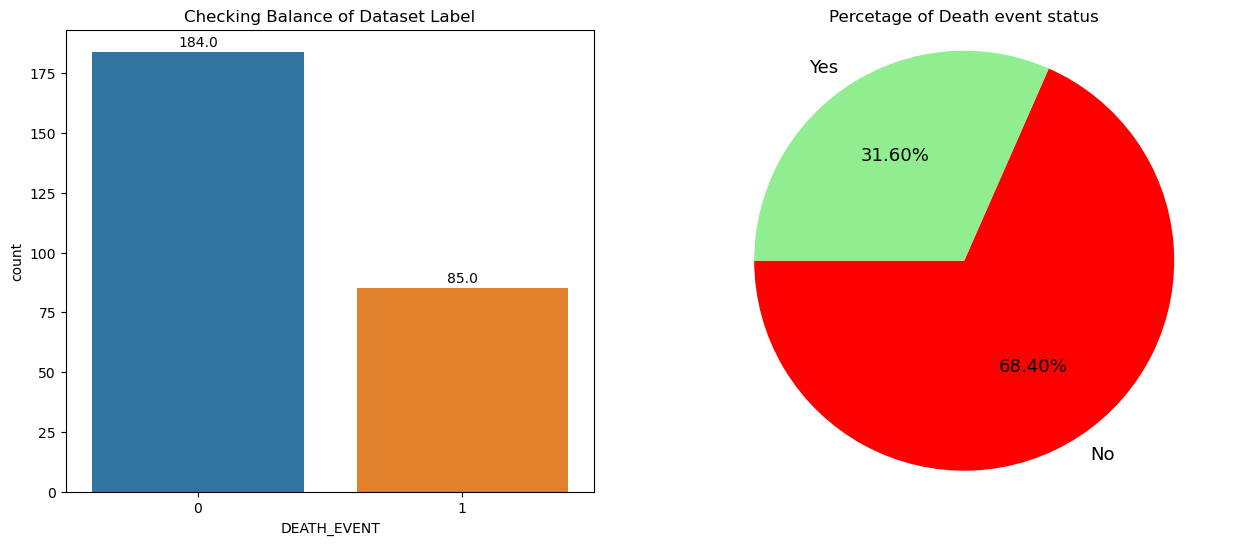

In [ ]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(121)
plt.title("Checking Balance of Dataset Label")
ax = sns.countplot(x=y_train, data=X_train)
for i in ax.patches:
     ax.annotate(format(i.get_height(), '0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')

plt.subplot(122)
plt.title("Percetage of Death event status")
death_event_size = y_train.value_counts().values.tolist()
death_event_label = 'No','Yes'
colors = ['red','lightgreen']
pcs, texts, autotexts = plt.pie(death_event_size, labels=death_event_label,colors=colors,
                             autopct='%2.2f%%', startangle=180)
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)

plt.axis('equal')
plt.show()

Terlihat bahwa data pada column "DEATH_EVENT" yang sudah menjadi y_train tidak
seimbang.



In [ ]:
columns = X_train.select_dtypes(include=[np.number]).columns

kami juga melakukan visualisasi data pada setiap kolom/feature yang ada untuk melihat frekuensi datanya.

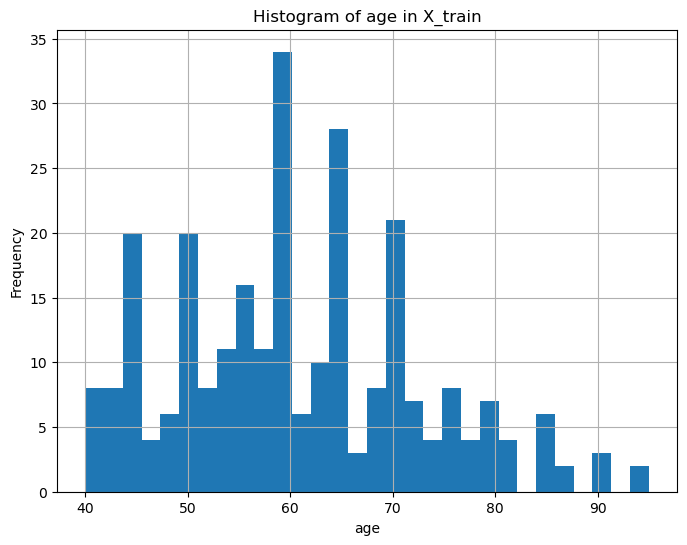

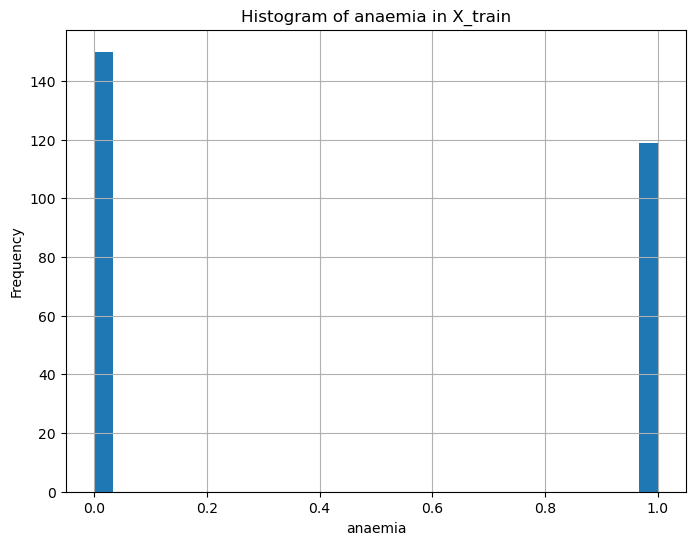

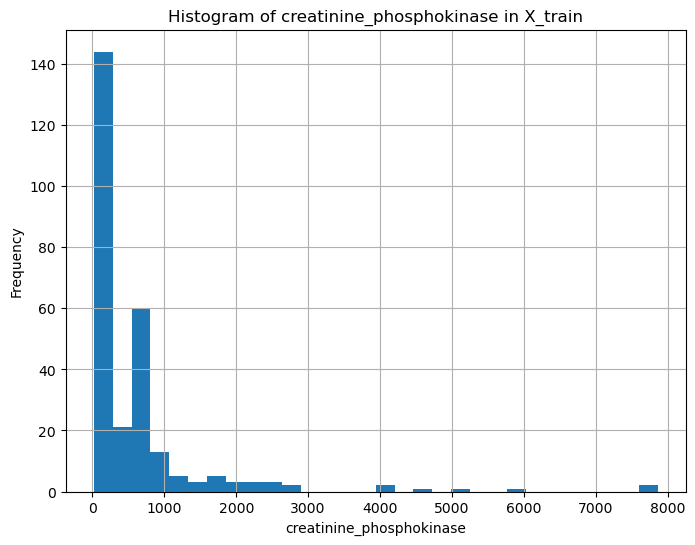

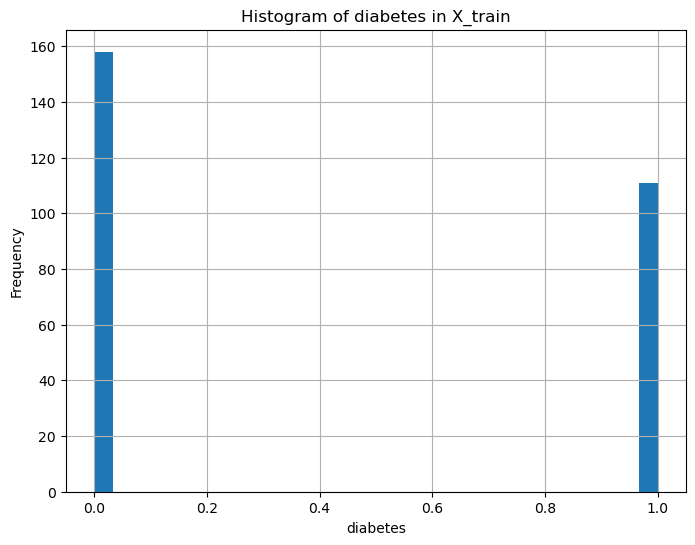

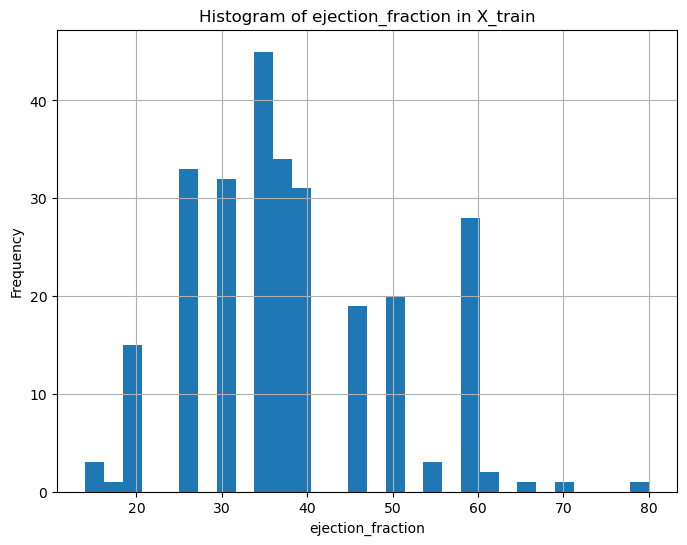

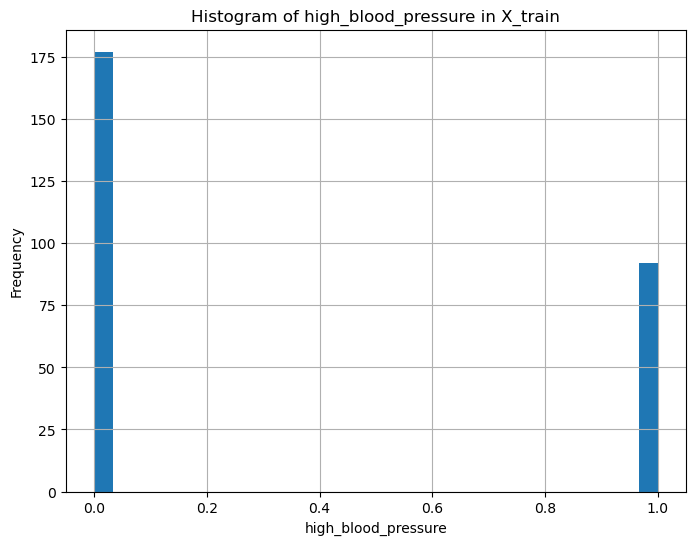

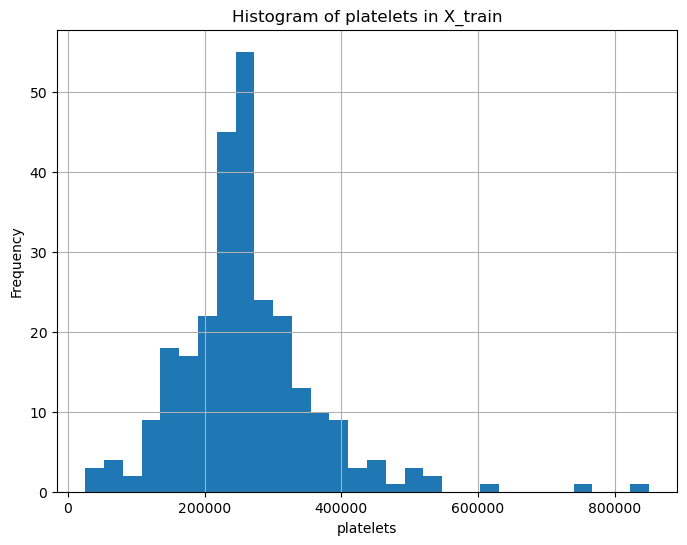

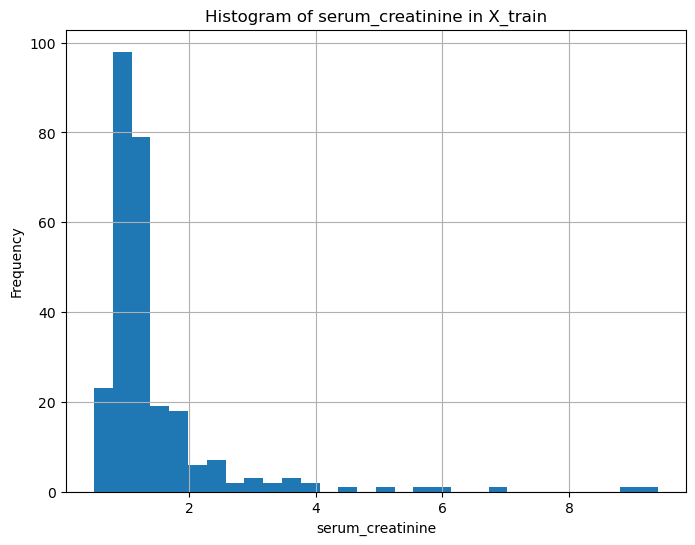

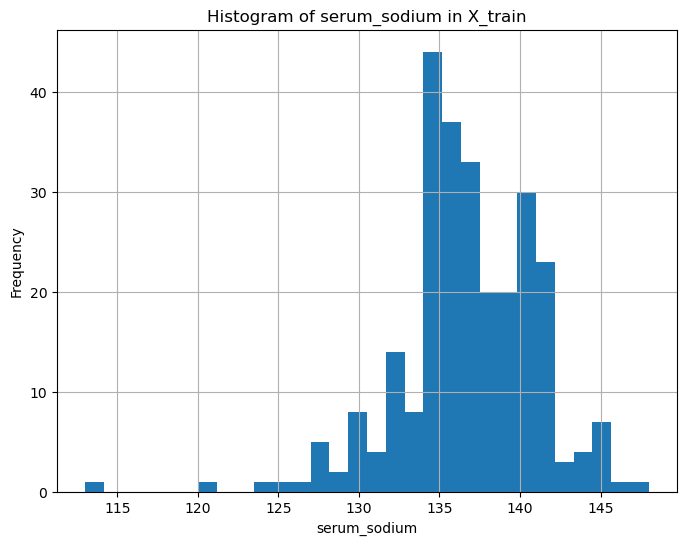

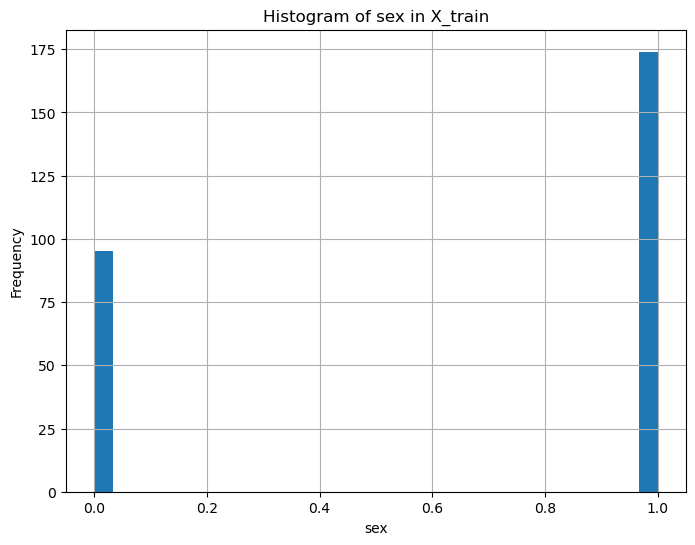

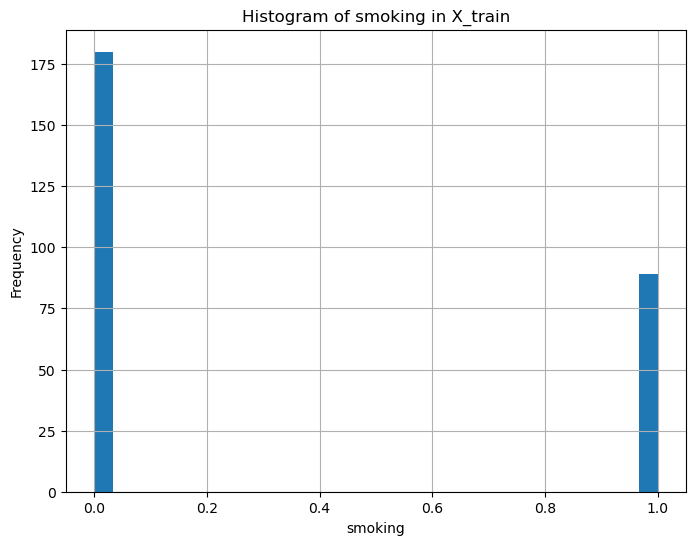

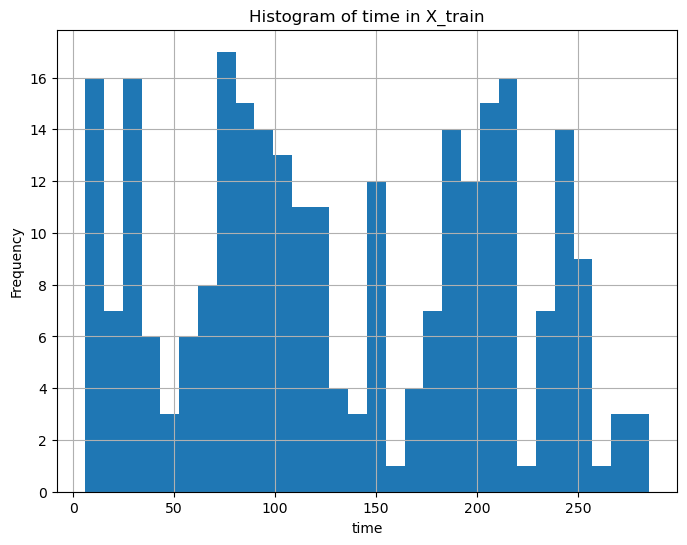

In [ ]:
for column in columns:
    plt.figure(figsize=(8, 6))
    X_train[column].hist(bins=30)
    plt.title(f'Histogram of {column} in X_train')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

VISUALIASI KOLOM YANG SUDAH DITENTUKAN DATA X_TRAIN

['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']


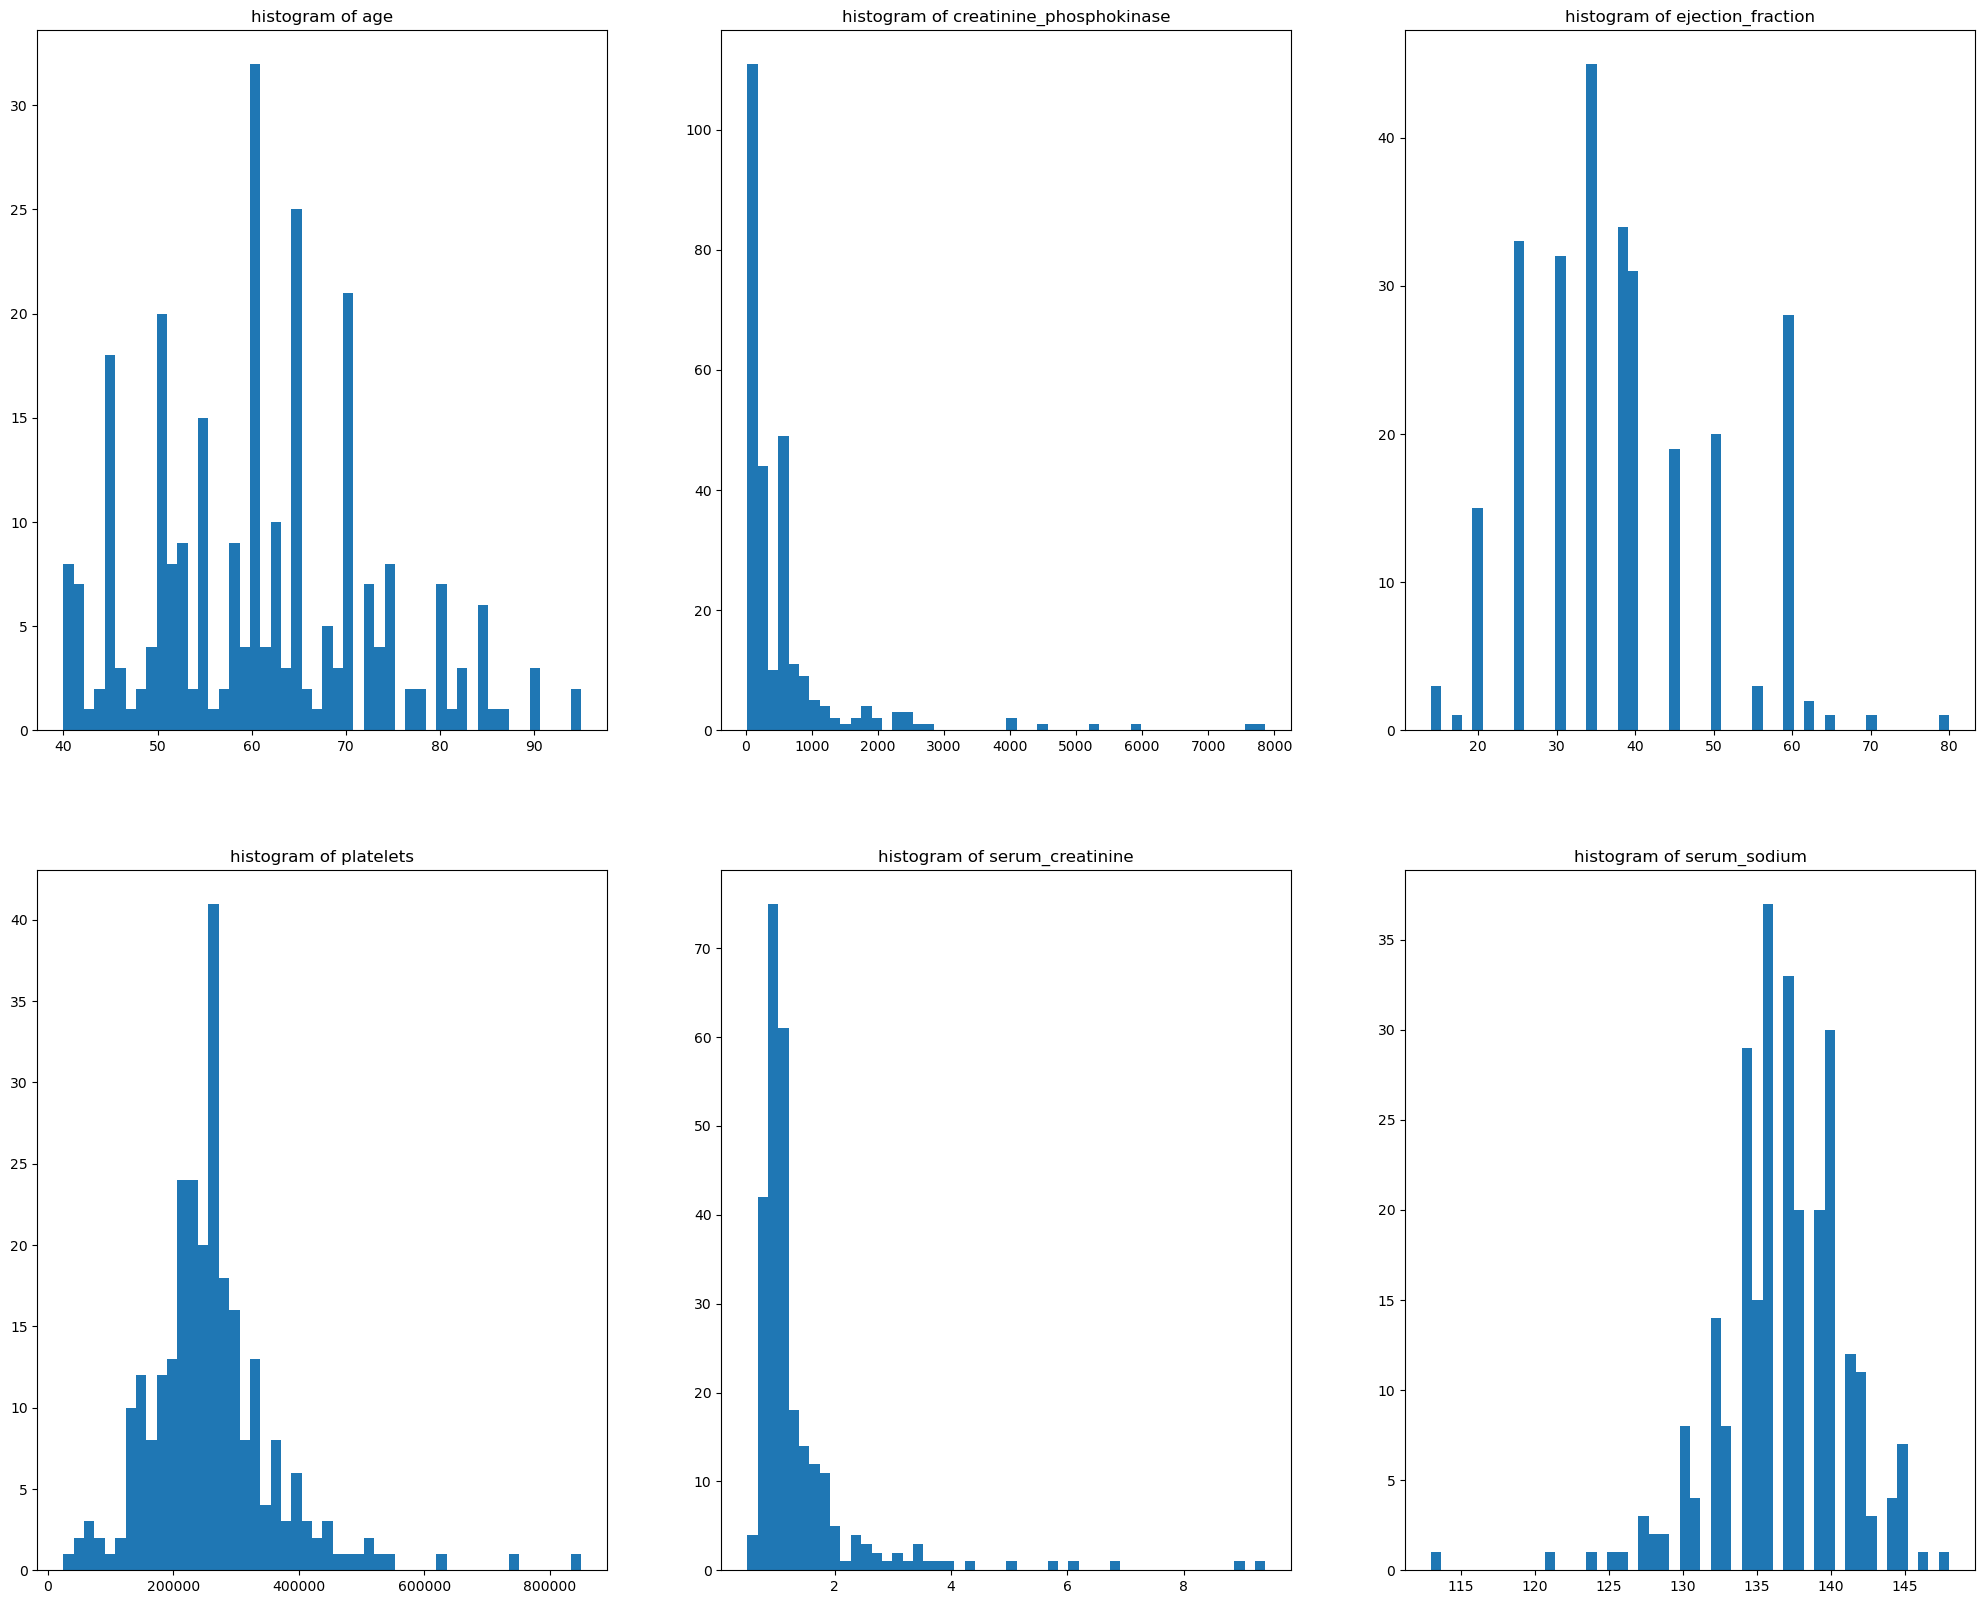

In [ ]:
cols = ['age','creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
print(cols)
fig, ax = plt.subplots(2,3, sharex=False, sharey=False, figsize=(25,20))
counts = 0
for col in cols:
    ax_x = counts//3
    ax_y = counts%3
    ax[ax_x, ax_y].hist(X_train[col],bins=50)
    ax[ax_x, ax_y].set_title(f"histogram of {col}")
    counts+=1
plt.show()

Kami juga ingin melihat distribusi datapada setiap kolom/feature yang ada

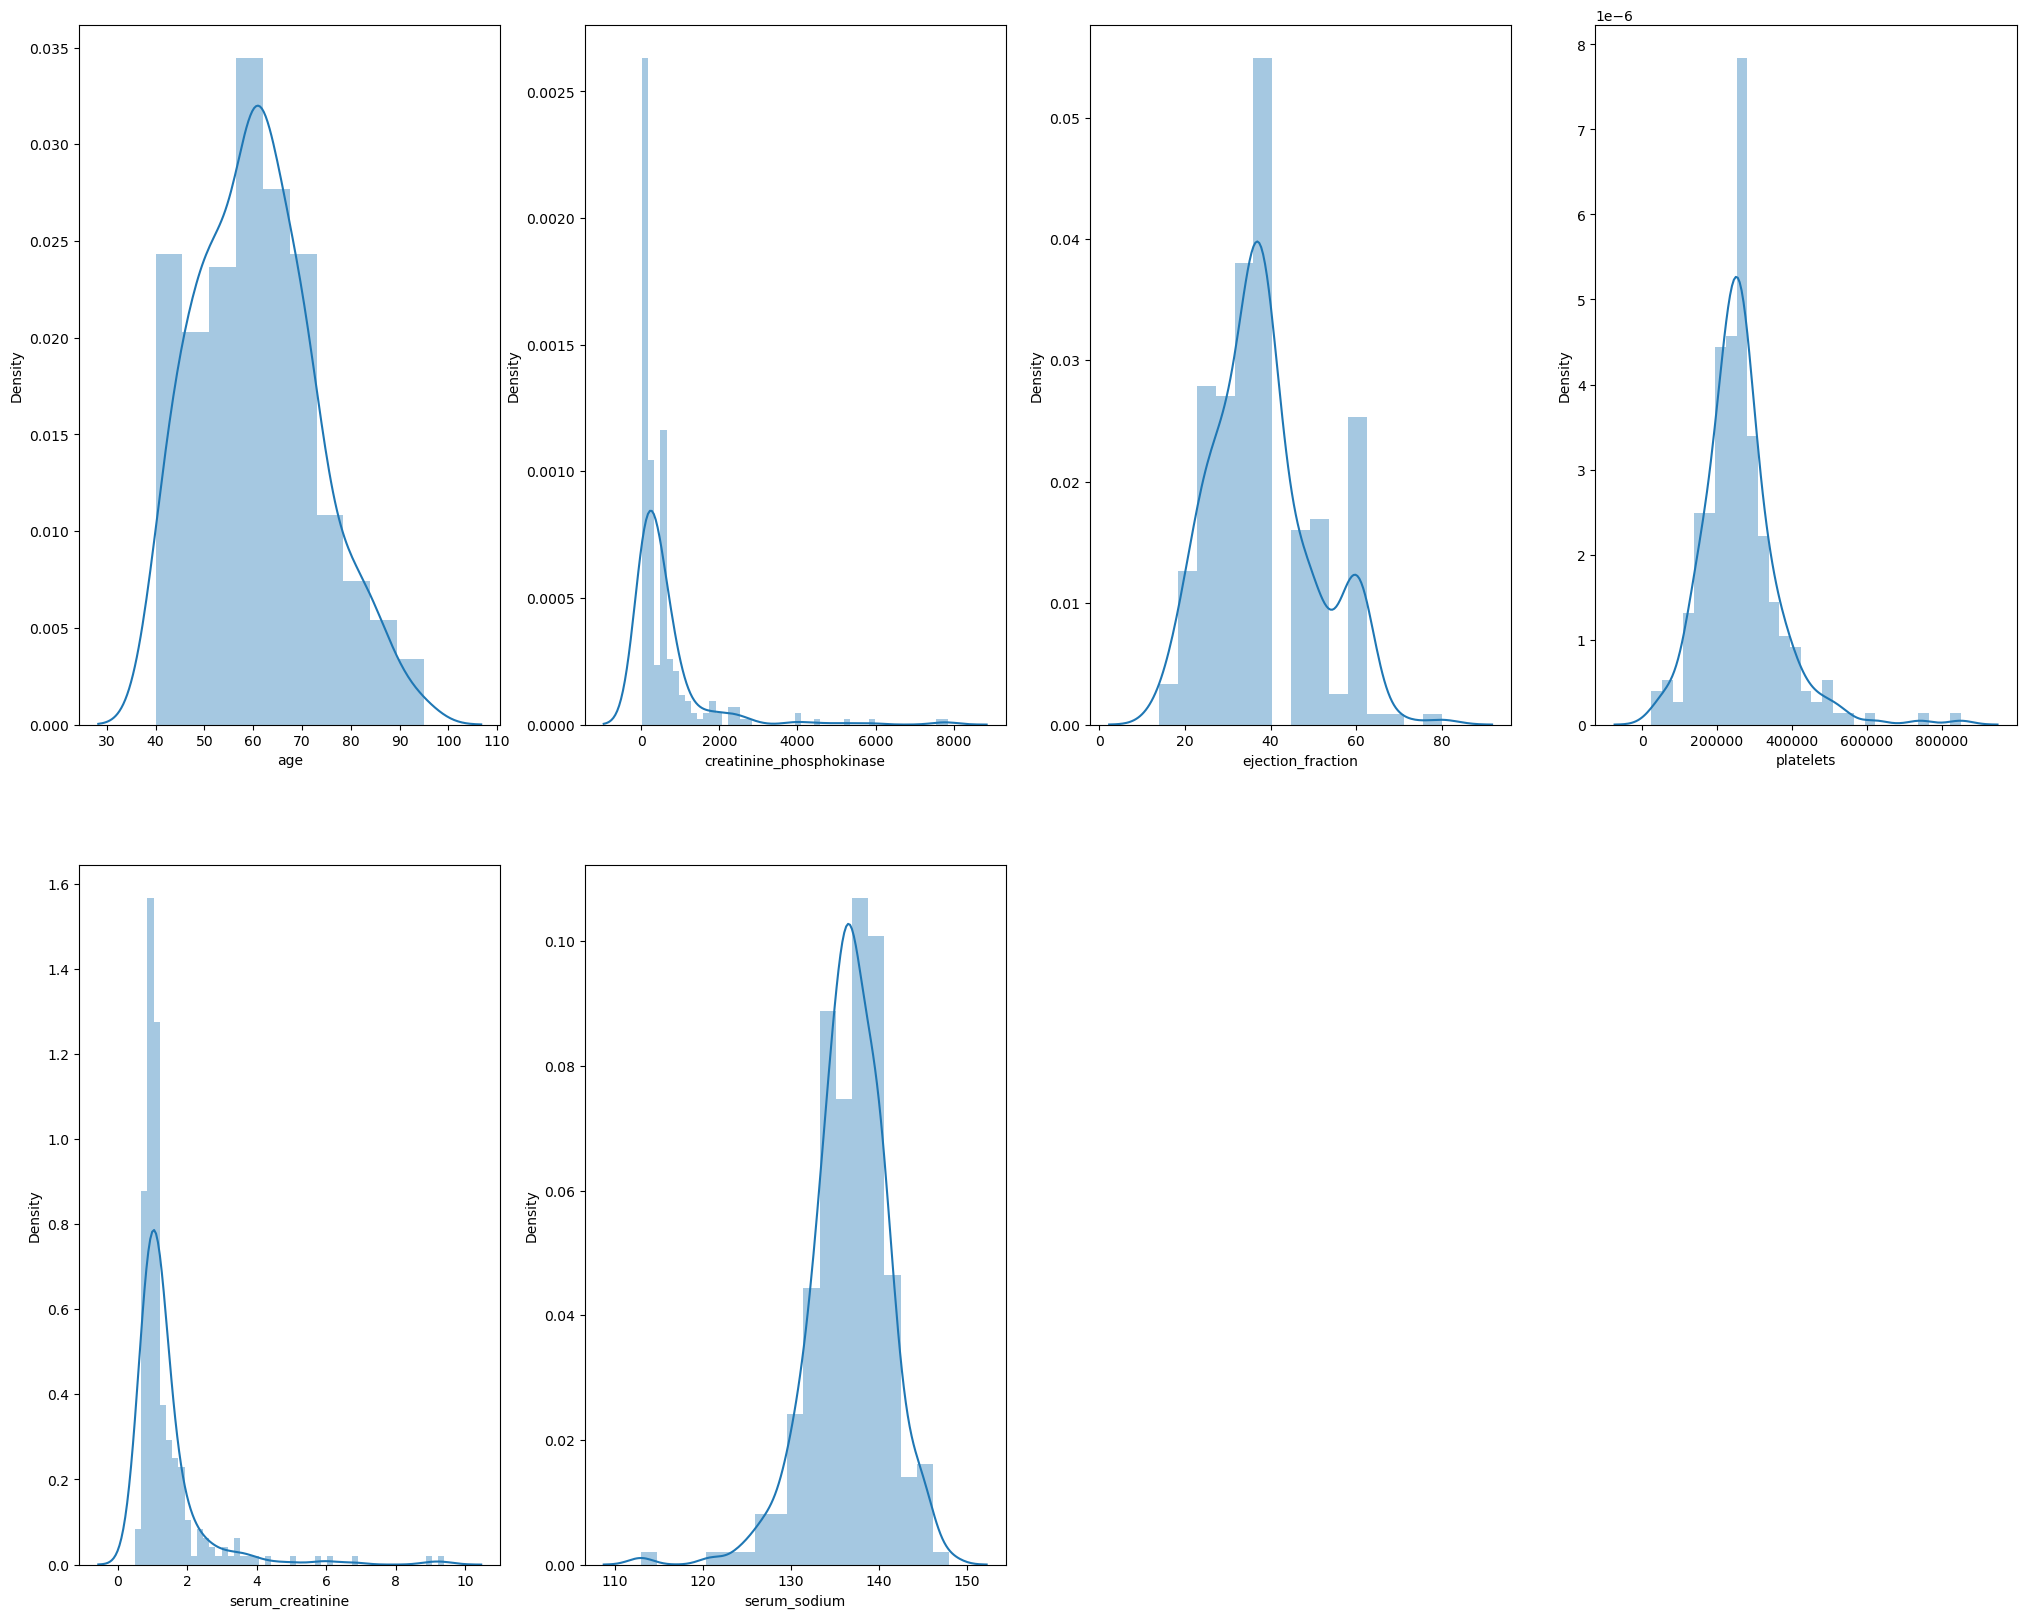

In [ ]:
fig = plt.figure(figsize=(25, 20))
j=1
for i in cols:
    plt.subplot(2,4,j)
    sns.distplot(X_train[i])
    j=j+1

dapat dilihat pada visualisasi diatas bahwa distribusi pada setiap kolom/feature tidak semuanya normal.

In [ ]:
X_train

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
225  75.0        0                       675         1                 60   
138  62.0        0                       281         1                 35   
156  52.0        1                        58         0                 35   
69   65.0        0                       113         1                 25   
205  50.0        1                       167         1                 45   
..    ...      ...                       ...       ...                ...   
163  50.0        1                      2334         1                 35   
213  48.0        1                       131         1                 30   
95   58.0        1                       133         0                 60   
32   50.0        1                       249         1                 35   
131  60.0        1                      1082         1                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
225                    0   265000.0              1.40           125    0   
138                    0   221000.0              1.00           136    0   
156                    0   277000.0              1.40           136    0   
69                     0   497000.0              1.83           135    1   
205                    0   362000.0              1.00           136    0   
..                   ...        ...               ...           ...  ...   
163                    0    75000.0              0.90           142    0   
213                    1   244000.0              1.60           130    0   
95                     1   219000.0              1.00           141    1   
32                     1   319000.0              1.00           128    0   
131                    0   250000.0              6.10           131    1   

     smoking  time  
225        0   205  
138        0   108  
156        0   120  
69         0    67  
205        0   187  
..       ...   ...  
163        0   126  
213        0   193  
95         0    83  
32         0    28  
131        0   107  

[269 rows x 12 columns]

kami membuat duplikat dari X_train kemudian kami juga menambahkan kolom/feature "kematian" yang berasal dari pengubahan kolom "DEATH_EVENT" yang berasal dari y_train dan menggunakannya melihat korelasi dari tiap kolom yang ada pada X_train untuk melihat keterkaitan tiap variabel yang ada terhadap variabel "kematian".


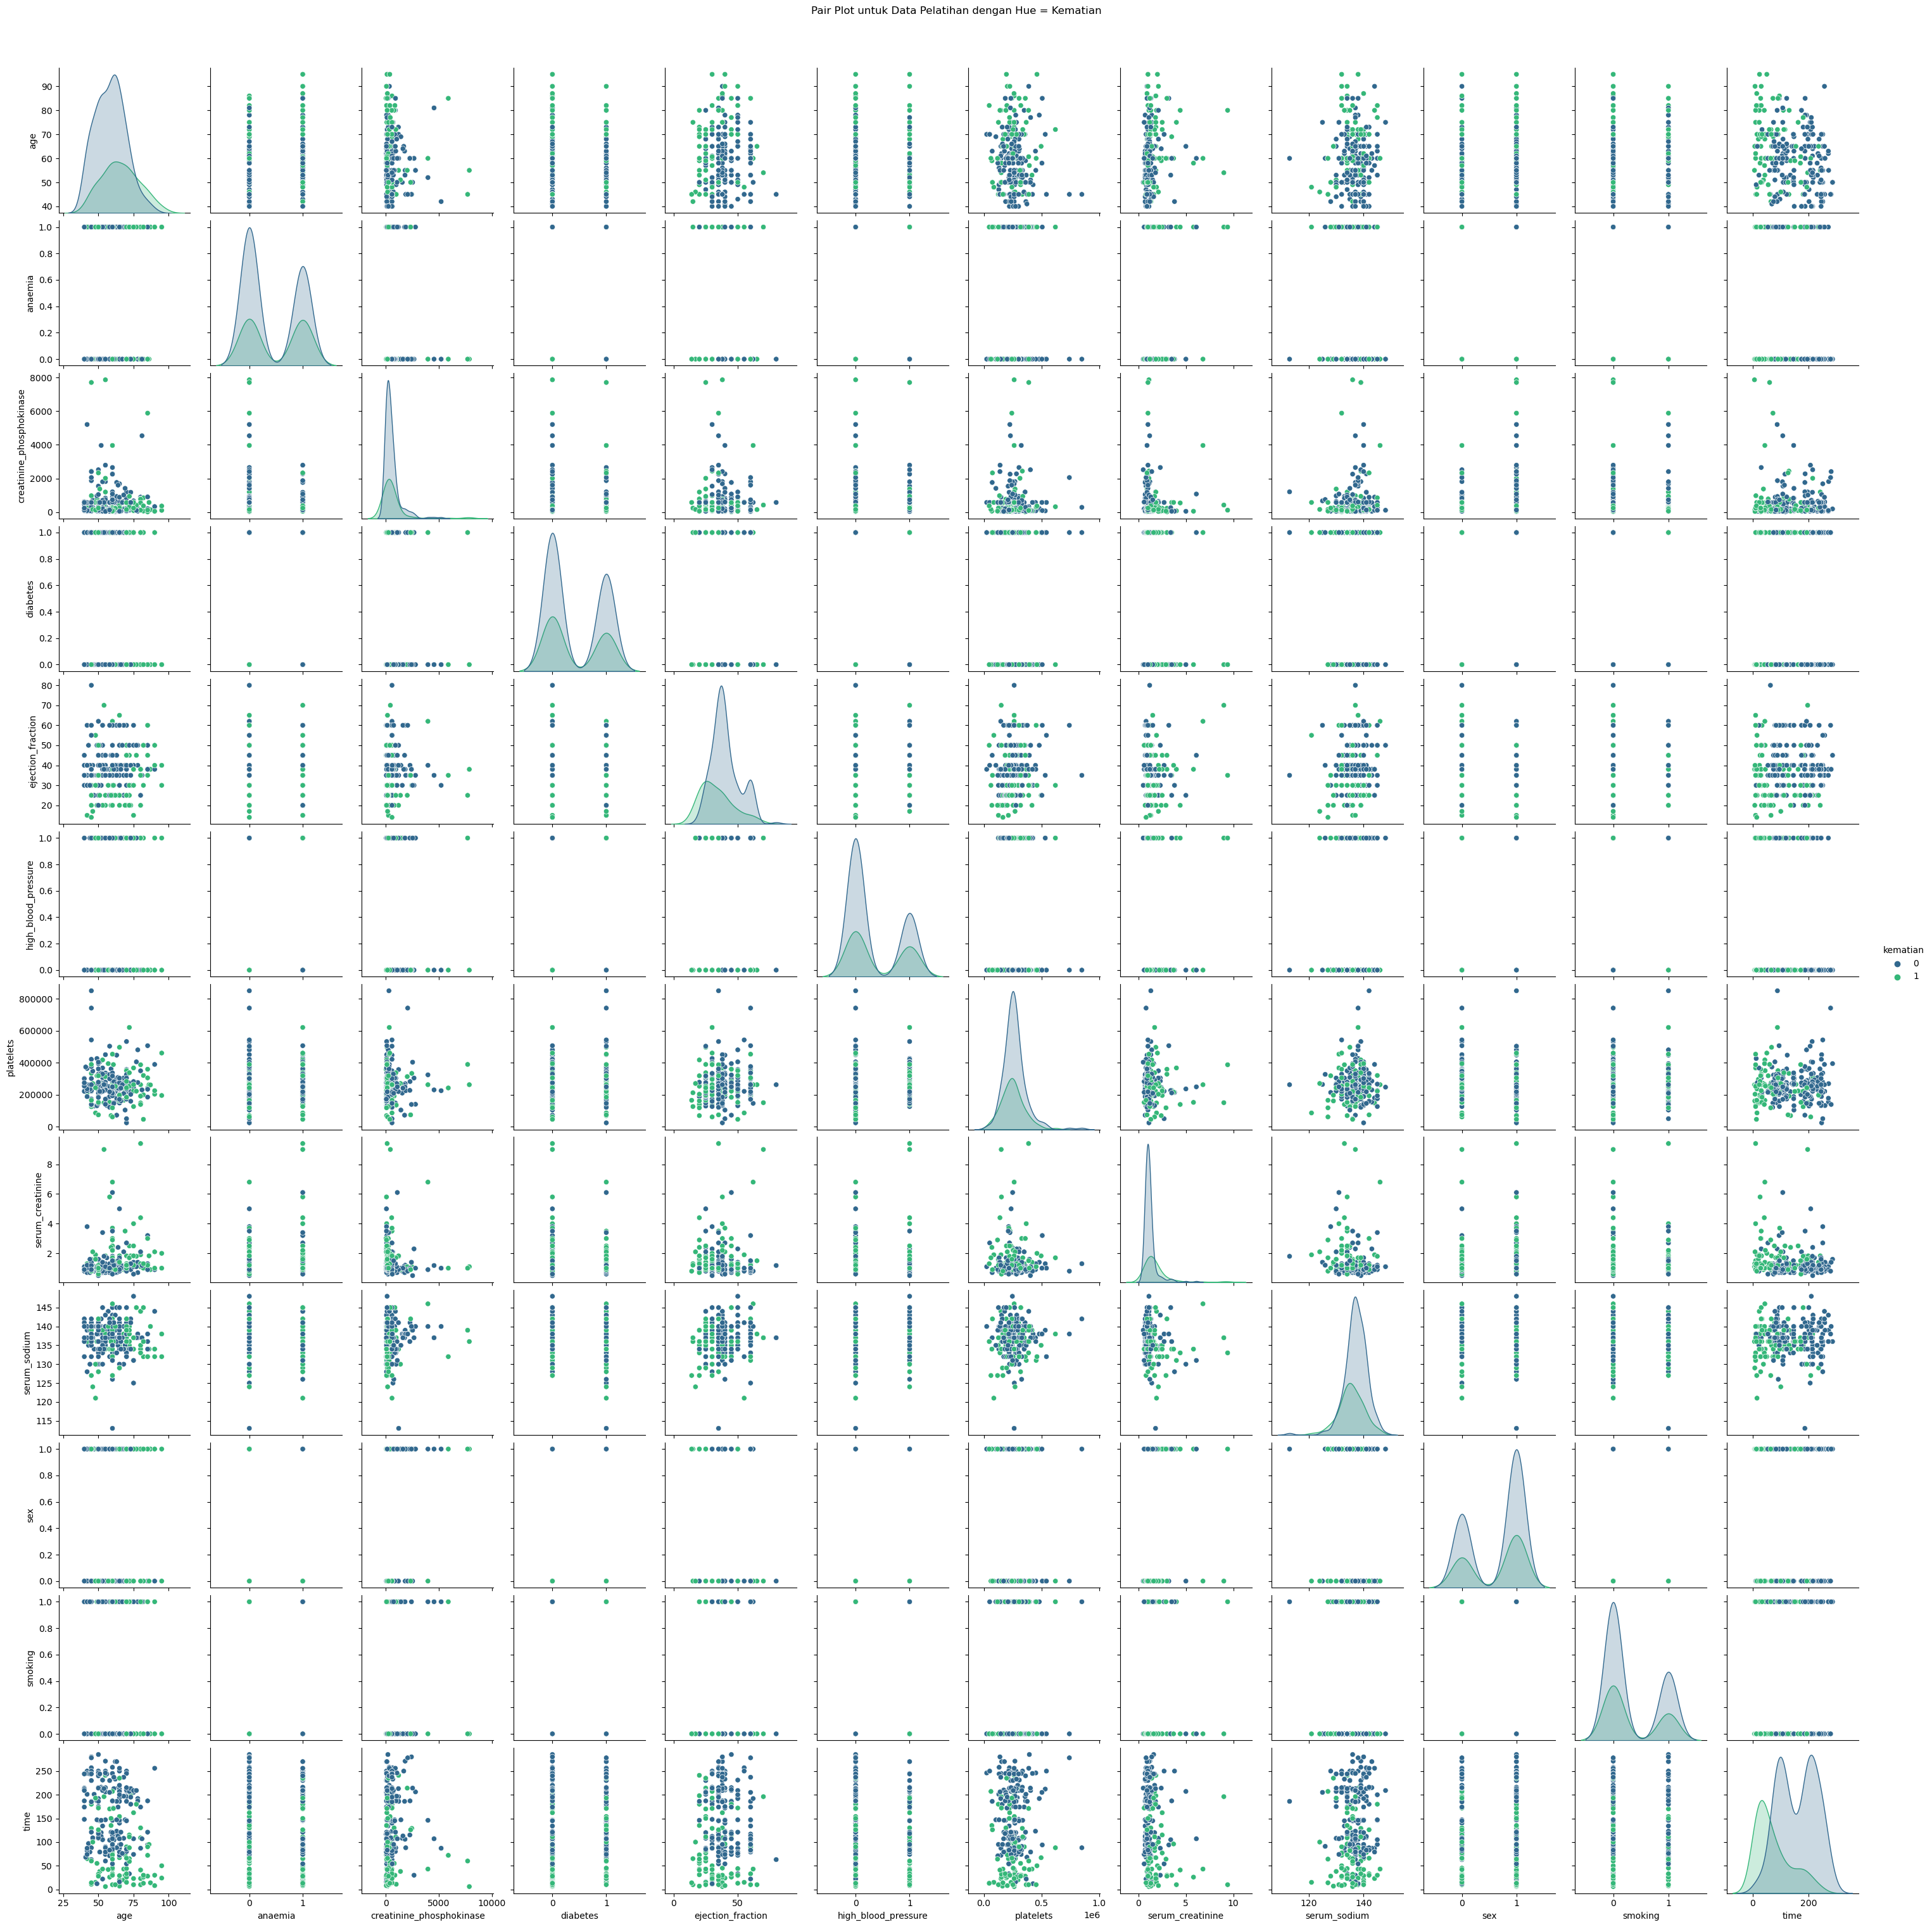

In [ ]:
X_train = X_train.copy()
X_train['kematian'] = y_train

# Membuat pair plot dengan Seaborn
sns.pairplot(X_train, hue='kematian', palette='viridis', height=2.5)
plt.suptitle('Pair Plot untuk Data Pelatihan dengan Hue = Kematian', y=1.02)
plt.show()

warna hijau menunjukkkan terjadinya kejadian kematian dan warna biru tidak menunjukkan adanya kejadian kematian. untuk variabel time dengan variabel yang lain, semakin tinggi waktu follow up (dalam hari) semakin tinggi pula tingkat status pasien yang masih hidup. selain itu, scatter plot dan density plot telah menunjukkan perbedaan yang cukup jelas antara data kejadian kematian dan tidak ada kejadian kematian.

In [ ]:
X_train

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
225  75.0        0                       675         1                 60   
138  62.0        0                       281         1                 35   
156  52.0        1                        58         0                 35   
69   65.0        0                       113         1                 25   
205  50.0        1                       167         1                 45   
..    ...      ...                       ...       ...                ...   
163  50.0        1                      2334         1                 35   
213  48.0        1                       131         1                 30   
95   58.0        1                       133         0                 60   
32   50.0        1                       249         1                 35   
131  60.0        1                      1082         1                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
225                    0   265000.0              1.40           125    0   
138                    0   221000.0              1.00           136    0   
156                    0   277000.0              1.40           136    0   
69                     0   497000.0              1.83           135    1   
205                    0   362000.0              1.00           136    0   
..                   ...        ...               ...           ...  ...   
163                    0    75000.0              0.90           142    0   
213                    1   244000.0              1.60           130    0   
95                     1   219000.0              1.00           141    1   
32                     1   319000.0              1.00           128    0   
131                    0   250000.0              6.10           131    1   

     smoking  time  kematian  
225        0   205         0  
138        0   108         0  
156        0   120         0  
69         0    67         1  
205        0   187         0  
..       ...   ...       ...  
163        0   126         1  
213        0   193         1  
95         0    83         0  
32         0    28         1  
131        0   107         0  

[269 rows x 13 columns]

Kemudian kami juga malakukan visualisasi untuk melihat perbandingan jumlah kematian pada setiap kolom/feature.

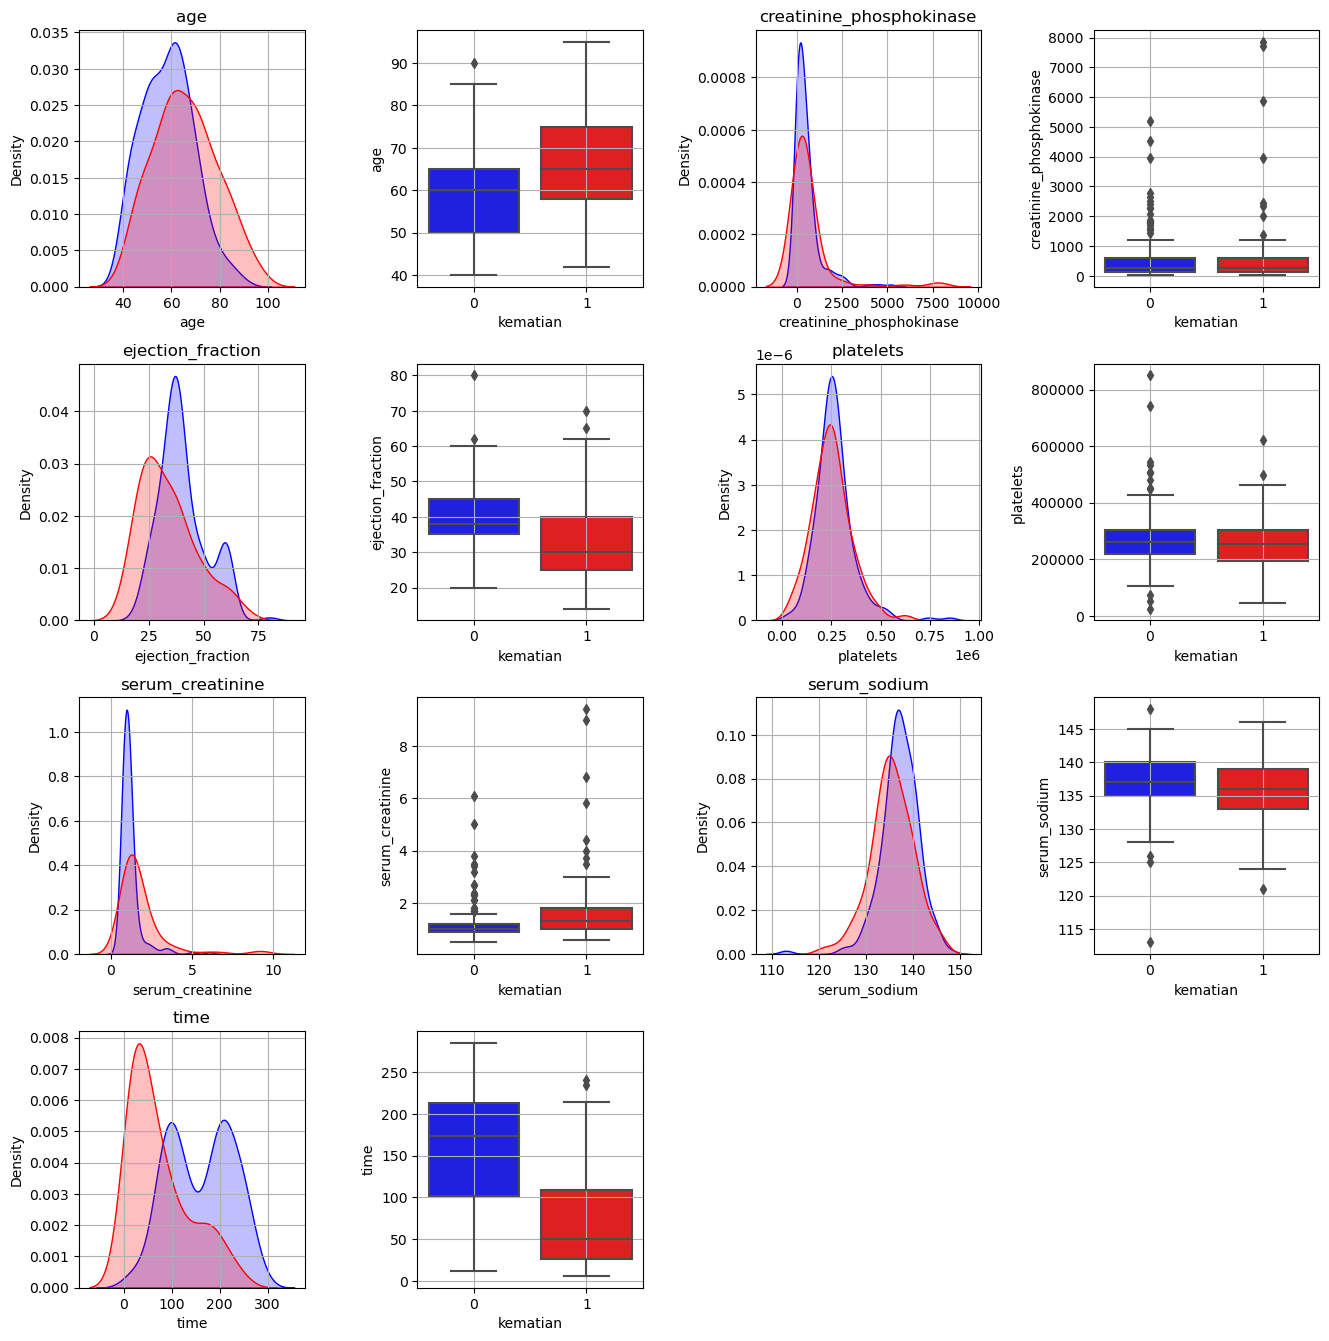

In [ ]:
cols = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
plt.figure(figsize=(16,25))
for i, col in enumerate(cols):
    plt.subplot(6,4, i*2+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.3)
    plt.title(col)
    plt.grid()
    sns.kdeplot(X_train.loc[X_train['kematian']==0,col],label='alive',color='blue',shade=True)
    sns.kdeplot(X_train.loc[X_train['kematian']==1,col],label='dead',color='red', shade=True)
    plt.subplot(6,4,i*2+2)
    sns.boxplot(data=X_train,y=col,x='kematian', palette=['blue','red'])
    plt.grid()

Terlihat pada visualisasi diatas bahwa tidak semua distribusi data adalah normal, beberapa data mengalami skewness dan terlihat adanya outliers

melihat hubungan antara data diabetes terhadap sex

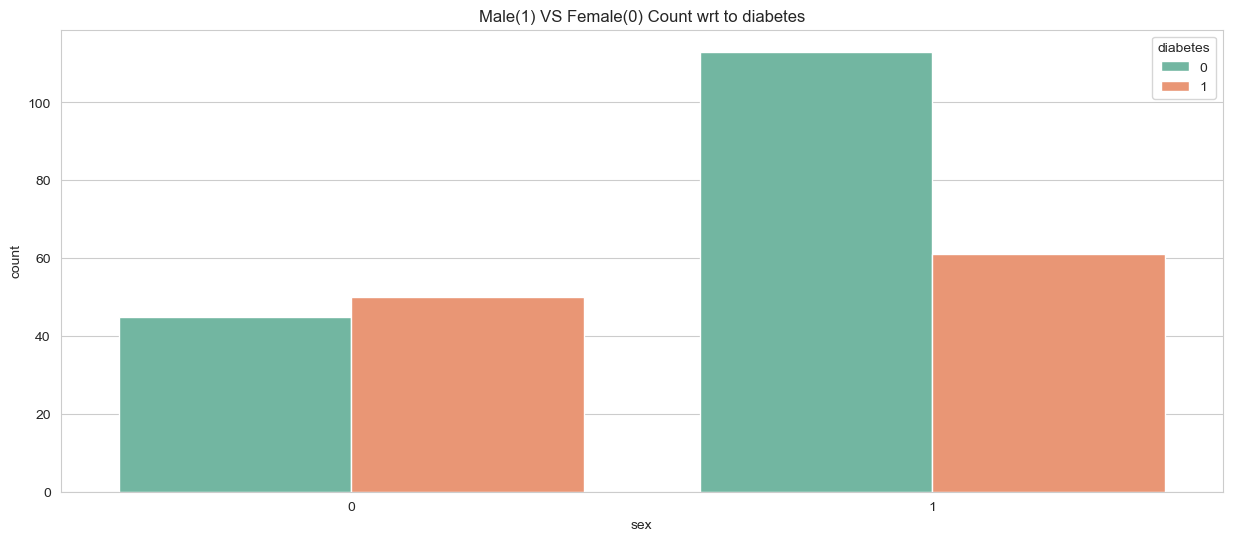

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="sex",hue="diabetes",data=X_train,palette="Set2").set(title='Male(1) VS Female(0) Count wrt to diabetes')
plt.show()

melihat data smoking terhadap sex

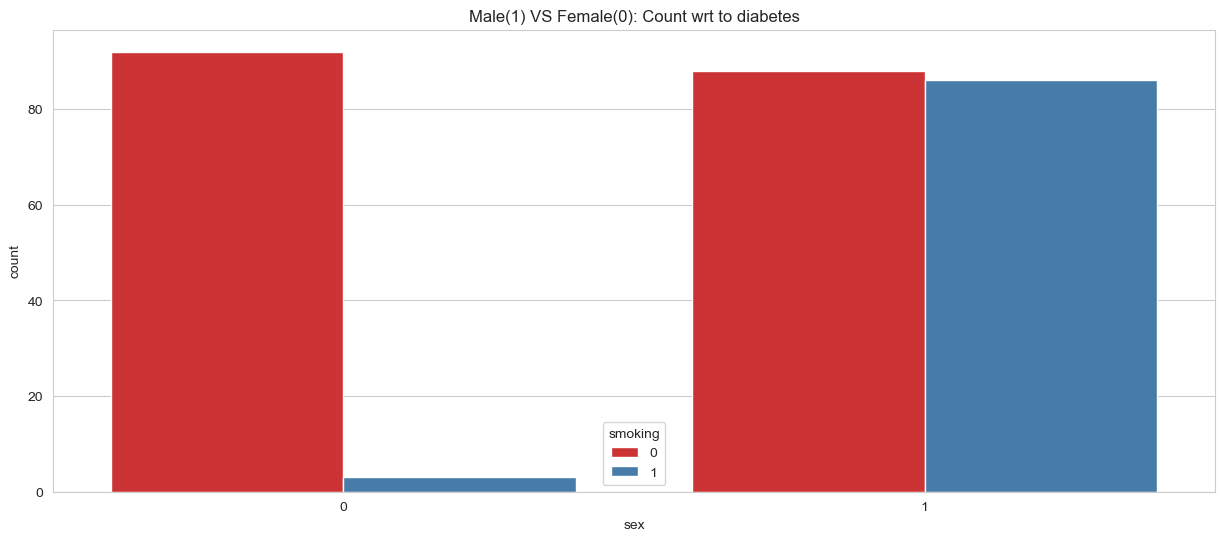

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="sex",hue="smoking",data=X_train,palette="Set1").set(title='Male(1) VS Female(0): Count wrt to diabetes')
plt.show()

kami juga melakukan visualisasi data untuk melihat usia kematian tertinggi yang ada pada data

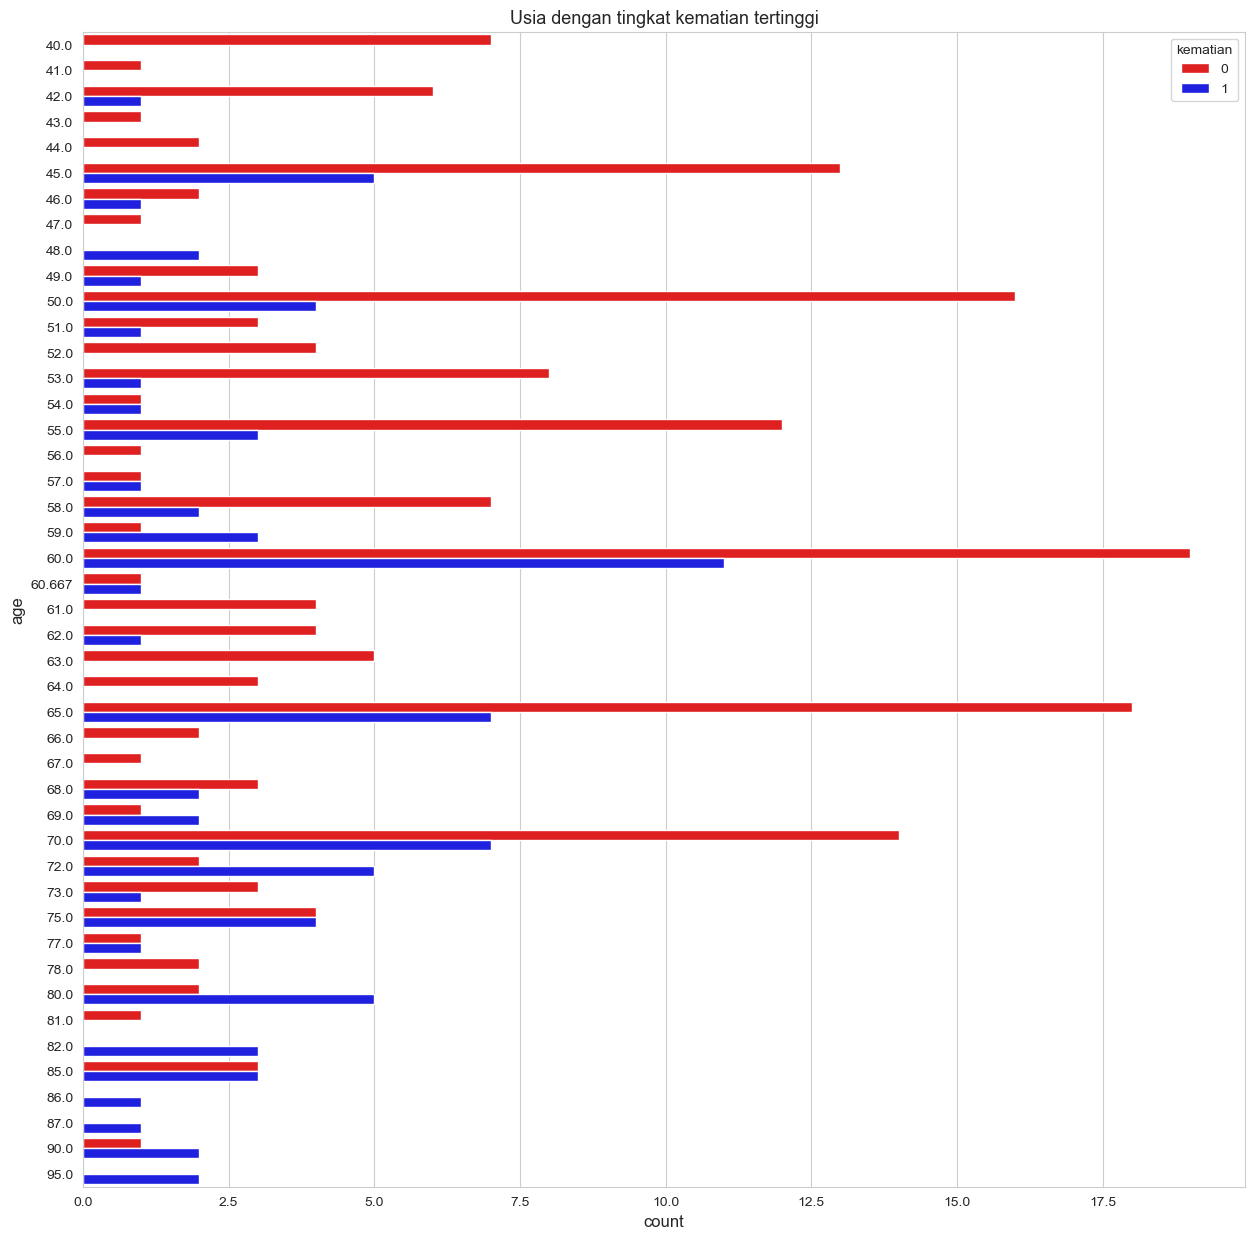

In [ ]:
plt.figure(figsize=(15,15))
plt.title("Usia dengan tingkat kematian tertinggi", fontsize=13)
plt.xlabel("Age", fontsize=12)
plt.ylabel("count",fontsize=12)
ax = sns.countplot(data=X_train, y='age', hue='kematian',palette=['red','blue'])

Usia pasien dengan status tingkat kematian tertinggi yaitu pasien dengan usia 60 tahun

In [ ]:
biner_var = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
for i, col in enumerate(biner_var):
    result=pd.crosstab(X_train[col],X_train['kematian']).apply(lambda z : z/z.sum(),axis=1)
    print("")
    print(result)


kematian         0         1
anaemia                     
0         0.713333  0.286667
1         0.647059  0.352941

kematian         0         1
diabetes                    
0         0.683544  0.316456
1         0.684685  0.315315

kematian                    0         1
high_blood_pressure                    
0                    0.711864  0.288136
1                    0.630435  0.369565

kematian         0         1
sex                         
0         0.673684  0.326316
1         0.689655  0.310345

kematian         0         1
smoking                     
0         0.683333  0.316667
1         0.685393  0.314607


0 = Alive, 1 = Death
* pasien yang memiliki anemia tingkat kematian lebih tinggi daripada yang tidak.
* proporsi tingkat kematian orang yang memiliki diabetes atau tidak, tidak ada perbedaan yang signifikan bahkan cenderung sama yaitu pada presentase 32%
* untuk pasien dengan tekanan darah tinggi seperti yang telah diuraikan diatas, pasien yang memiliki darah tinggi memiliki tingkat kejadian kematian yang tinggi dibanding dengan pasien yang tidak memiliki.
* status sex tidak mempengaruhi tingkat status kematian secara signifikan terhadap death event
* status pasien perokok atau tidak, tidak terlalu berpengaruh banyak terhadap death event

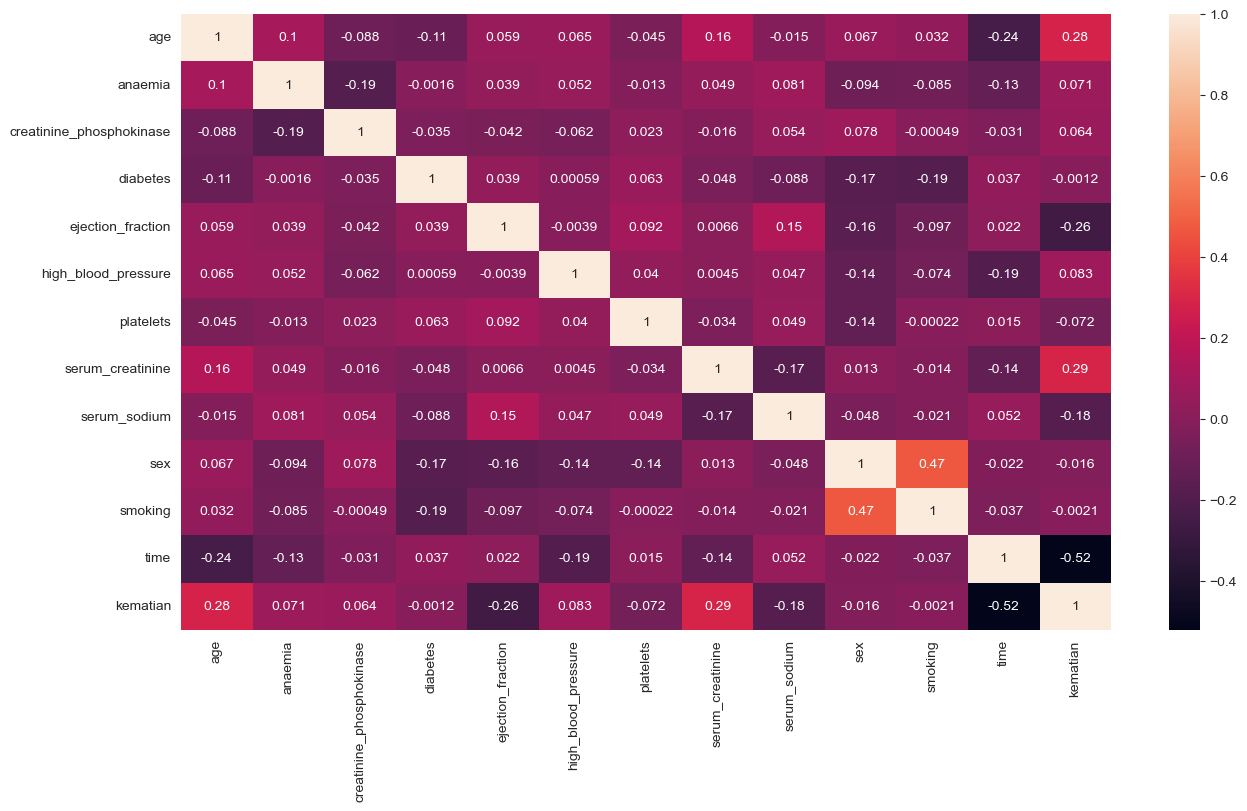

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

seperti yang telah diuraikan diatas terdapat beberapa fitur yang kurang berpengaruh terhadap kematian seperti status diabetes, smoking dan sex.

karena Kolom diabetes, smoking dan sex tidak memiliki pengaruh yang cukup pada kolom kematian, maka kita akan membuang kolom itu dengan melakukan drop table.

In [ ]:
X_train.drop(columns=['diabetes','smoking','sex','kematian'],axis=1, inplace=True)

kolom/feature kematian dihapus karena pada analisis sebelumnya digunakan untuk mempermudah Explanatory Data Analysis(EDA), karena kolom/feature kematian digunakan pada variabel y yang dimana y = y_train

In [ ]:
X_train

age  anaemia  creatinine_phosphokinase  ejection_fraction  \
225  75.0        0                       675                 60   
138  62.0        0                       281                 35   
156  52.0        1                        58                 35   
69   65.0        0                       113                 25   
205  50.0        1                       167                 45   
..    ...      ...                       ...                ...   
163  50.0        1                      2334                 35   
213  48.0        1                       131                 30   
95   58.0        1                       133                 60   
32   50.0        1                       249                 35   
131  60.0        1                      1082                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  time  
225                    0   265000.0              1.40           125   205  
138                    0   221000.0              1.00           136   108  
156                    0   277000.0              1.40           136   120  
69                     0   497000.0              1.83           135    67  
205                    0   362000.0              1.00           136   187  
..                   ...        ...               ...           ...   ...  
163                    0    75000.0              0.90           142   126  
213                    1   244000.0              1.60           130   193  
95                     1   219000.0              1.00           141    83  
32                     1   319000.0              1.00           128    28  
131                    0   250000.0              6.10           131   107  

[269 rows x 9 columns]

In [ ]:
X_train.dropna()
X_train.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
time                        0
dtype: int64

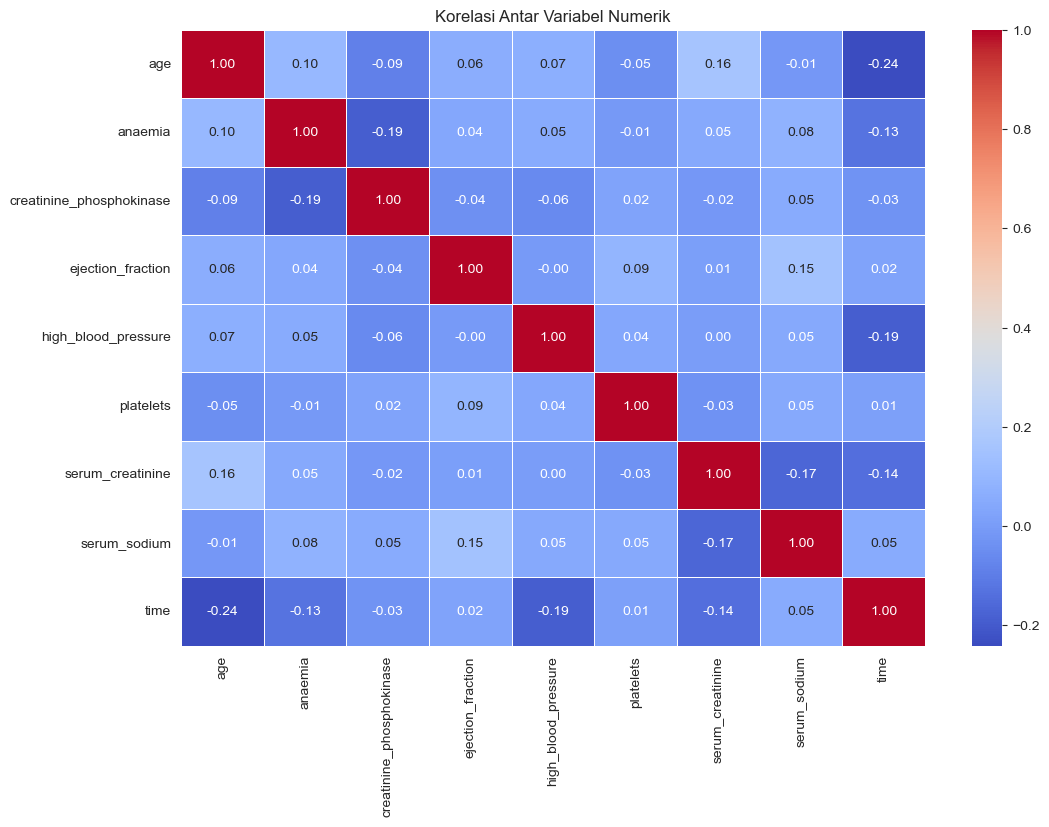

In [ ]:
# Korelasi antar variabel numerik
correlation_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

korelasi antar kolom di X_train yang beberapa kolomnya sudah dihapus

## HANDLING OUTLIER

['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


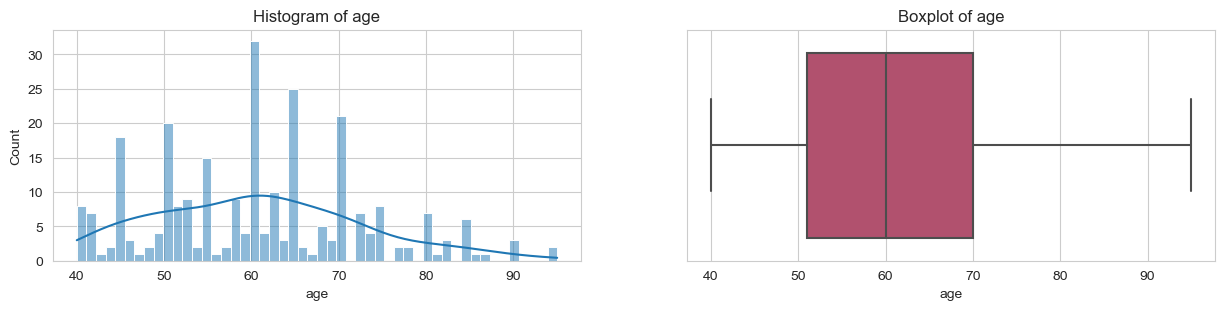

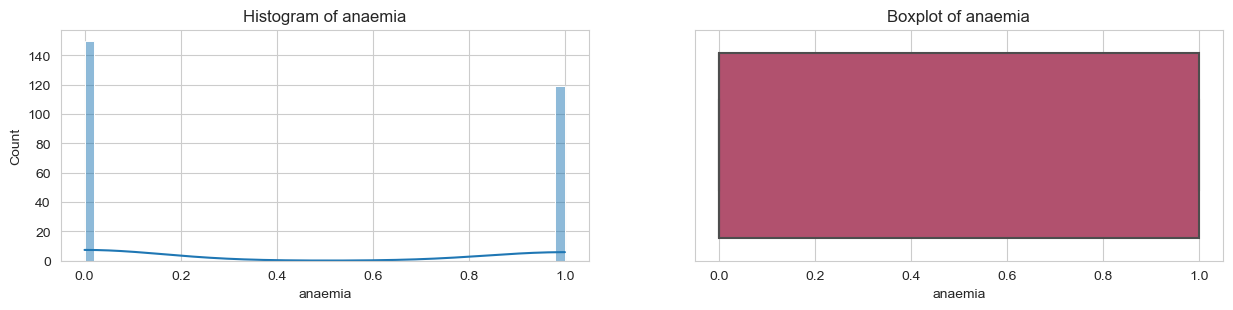

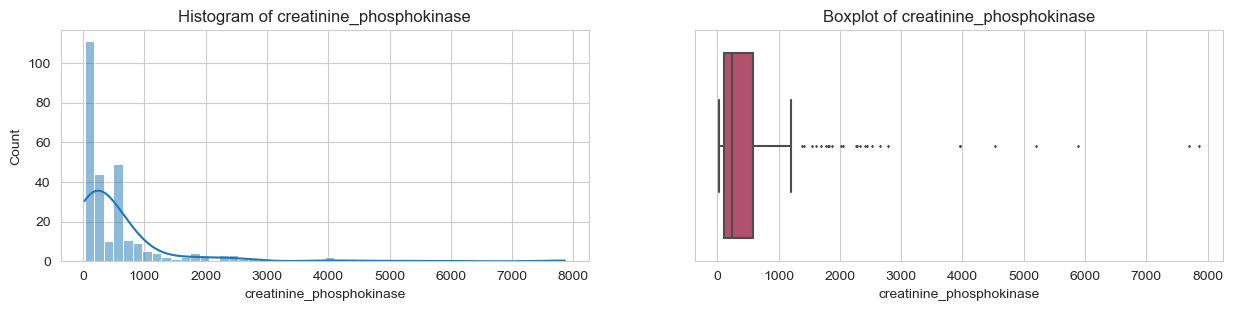

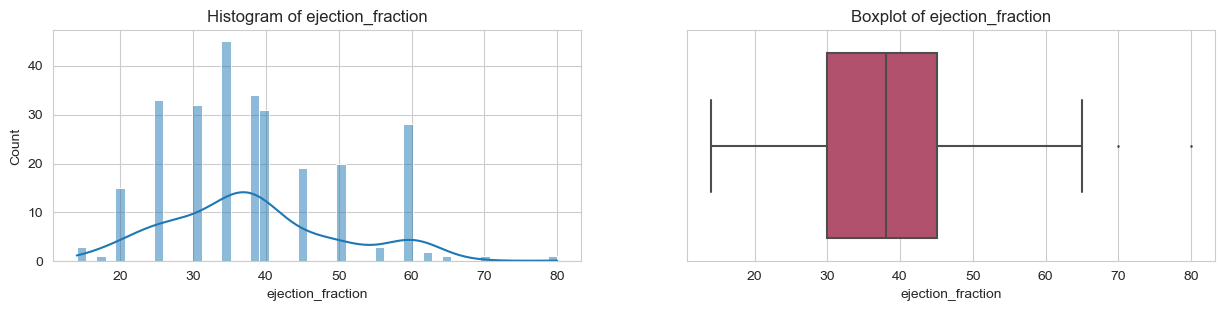

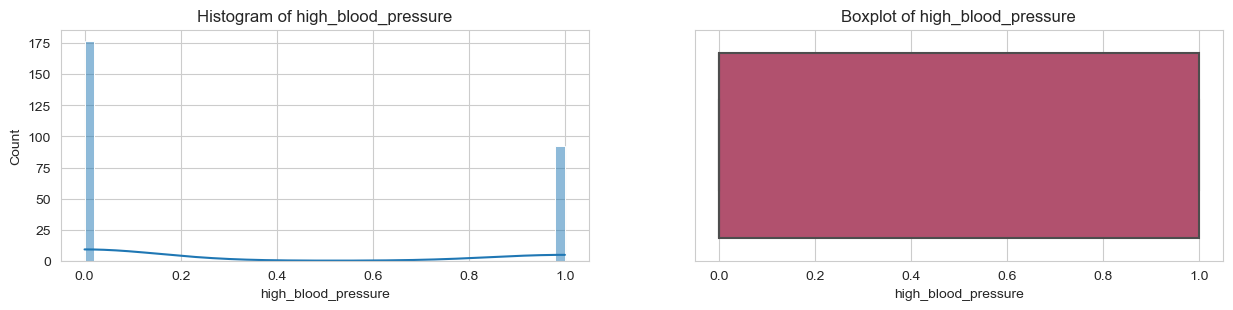

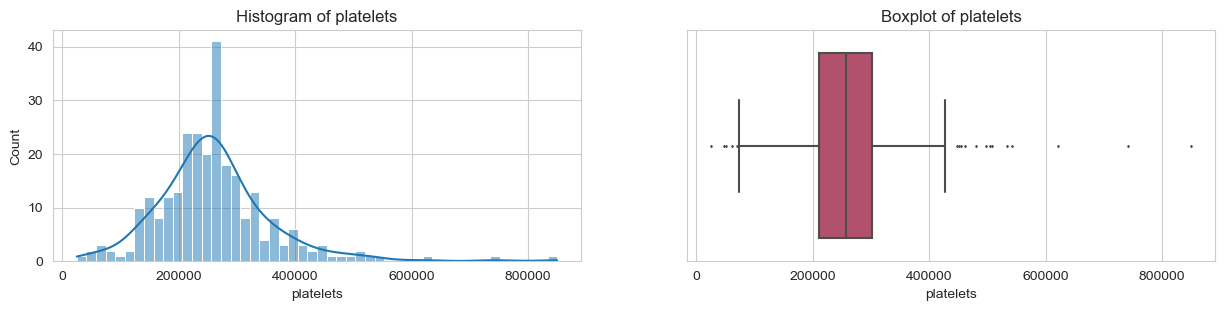

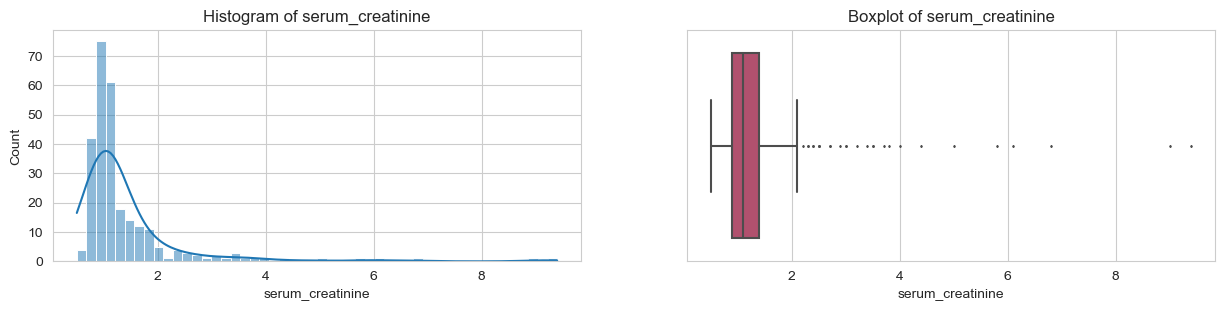

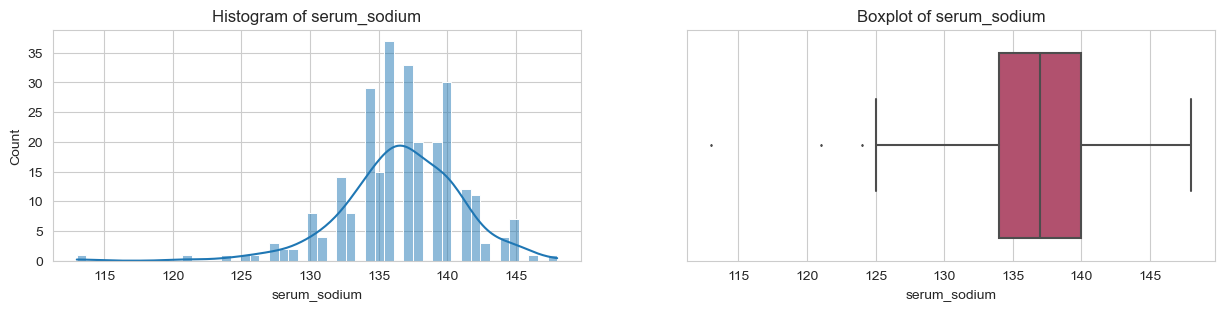

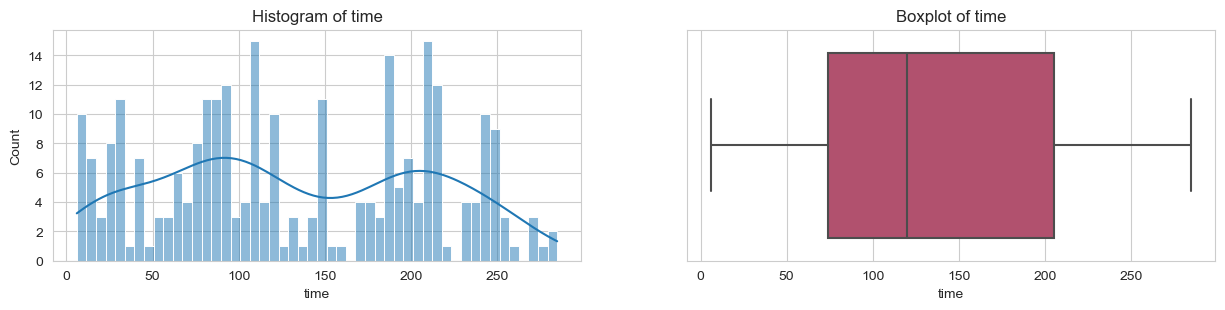

In [ ]:
columns = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
print(columns)
for i in columns:
    fig, ax = plt.subplots(1,2, figsize=(15,3))
    # Plot histogram on the first subplot
    sns.histplot(X_train[i], bins=50, kde=True, ax=ax[0])
    ax[0].set_title(f'Histogram of {i}')

    # Plot boxplot on the second subplot
    sns.boxplot(x=X_train[i], ax=ax[1], palette='flare', fliersize=1)
    ax[1].set_title(f'Boxplot of {i}')

In [ ]:
def RemoveOutliers(columns):
    for col in columns:
        iqr = X_train[col].quantile(0.75)-df[col].quantile(0.25)
        lower_threshold = X_train[col].quantile(0.25)-(iqr*1.5)
        upper_threshold = X_train[col].quantile(0.75)+(iqr*1.5)
        print(f"nilai outlier pada fitur {col} : <{round(lower_threshold,2)} atau >{round(upper_threshold,2)}")
        X_train.loc[(df[col]<=lower_threshold),col] = lower_threshold
        X_train.loc[(df[col]>=upper_threshold),col] = upper_threshold
RemoveOutliers(columns)

nilai outlier pada fitur age : <22.5 atau >98.5
nilai outlier pada fitur anaemia : <-1.5 atau >2.5
nilai outlier pada fitur creatinine_phosphokinase : <-583.25 atau >1280.25
nilai outlier pada fitur ejection_fraction : <7.5 atau >67.5
nilai outlier pada fitur high_blood_pressure : <-1.5 atau >2.5
nilai outlier pada fitur platelets : <75750.0 atau >436250.0
nilai outlier pada fitur serum_creatinine : <0.15 atau >2.15
nilai outlier pada fitur serum_sodium : <125.0 atau >149.0
nilai outlier pada fitur time : <-124.0 atau >403.0


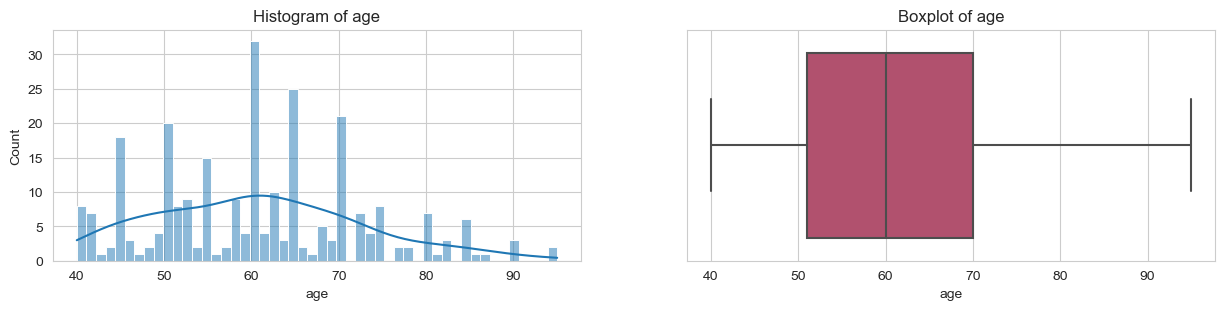

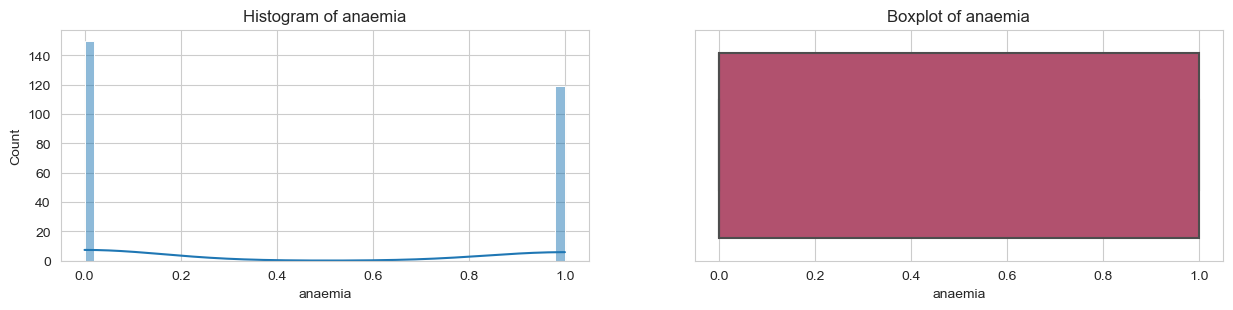

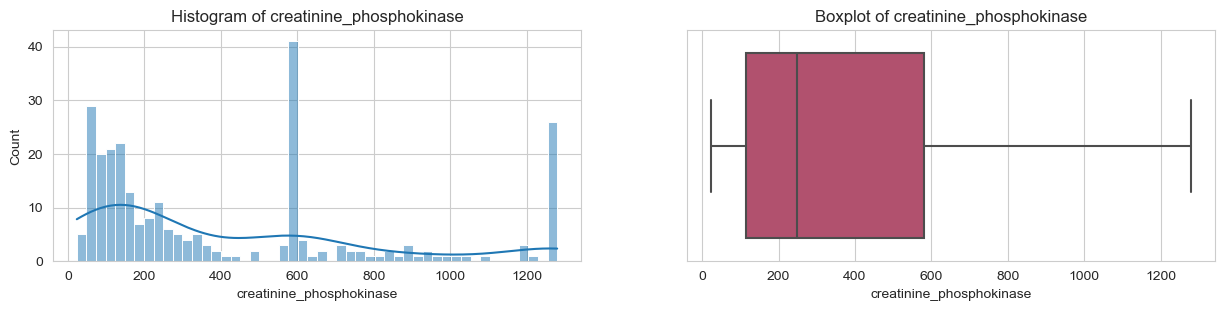

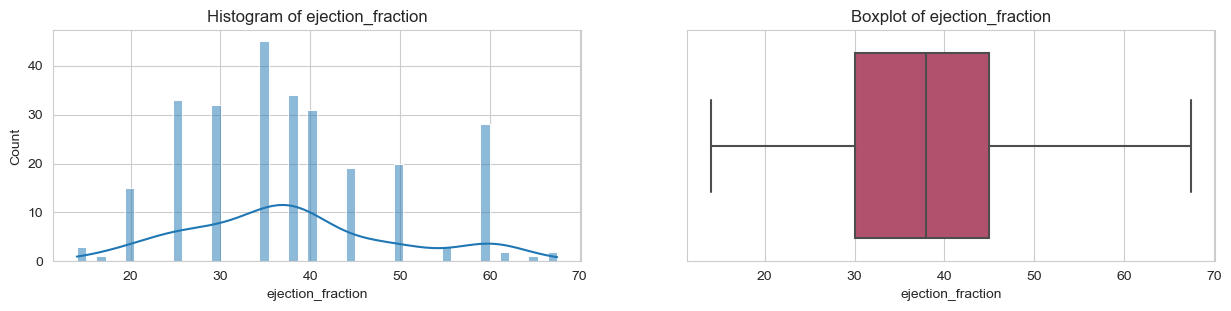

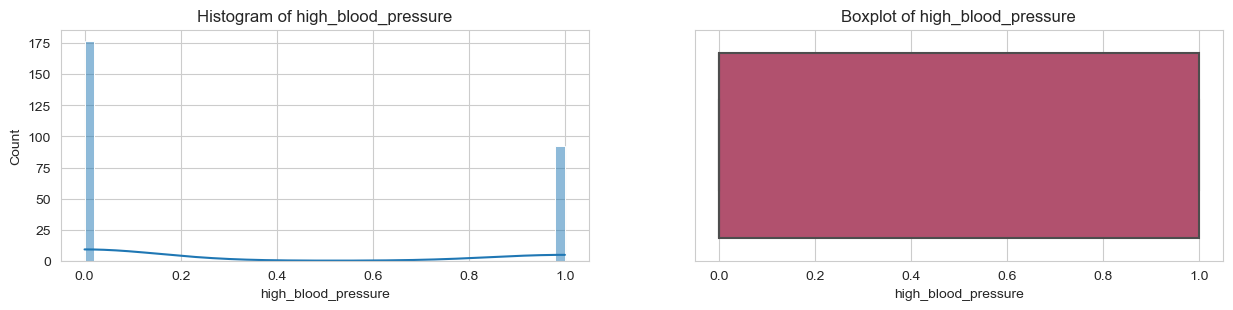

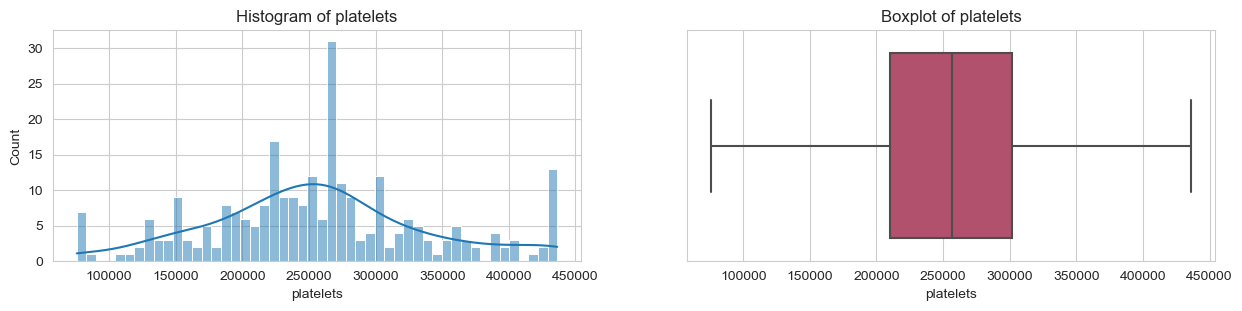

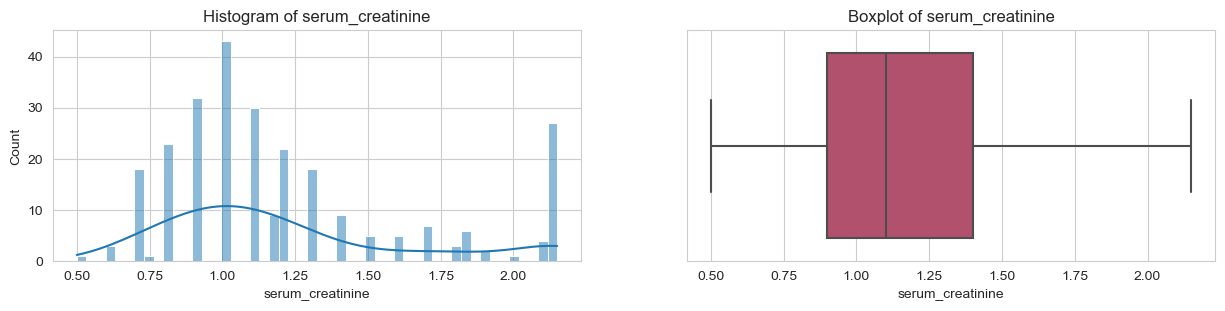

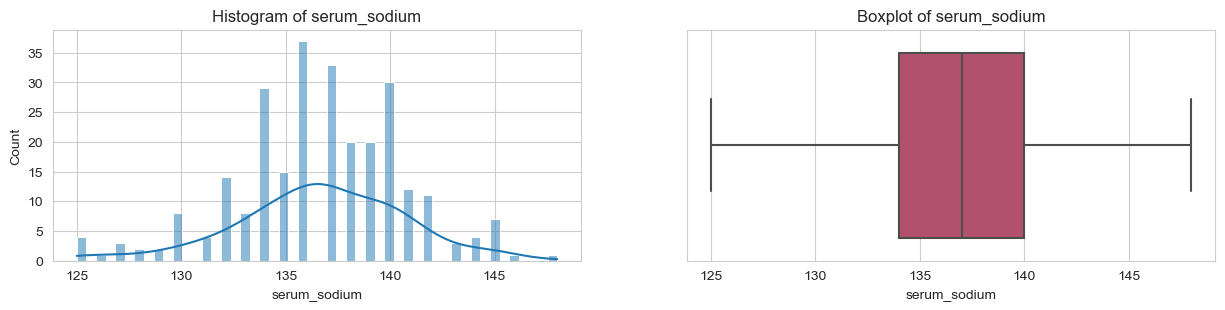

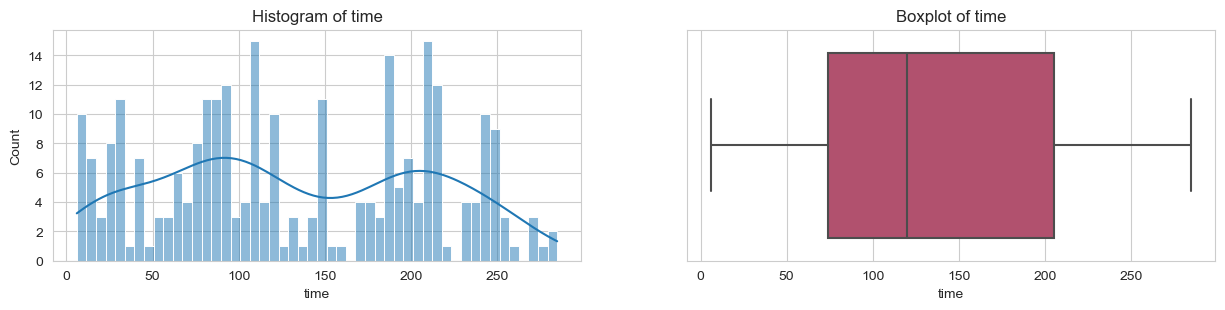

In [ ]:
for i in columns:
    fig, ax = plt.subplots(1,2, figsize=(15,3))
    # Plot histogram on the first subplot
    sns.histplot(X_train[i], bins=50, kde=True, ax=ax[0])
    ax[0].set_title(f'Histogram of {i}')

    # Plot boxplot on the second subplot
    sns.boxplot(x=X_train[i], ax=ax[1], palette='flare', fliersize=1)
    ax[1].set_title(f'Boxplot of {i}')

## HANDLING SKEWNESS

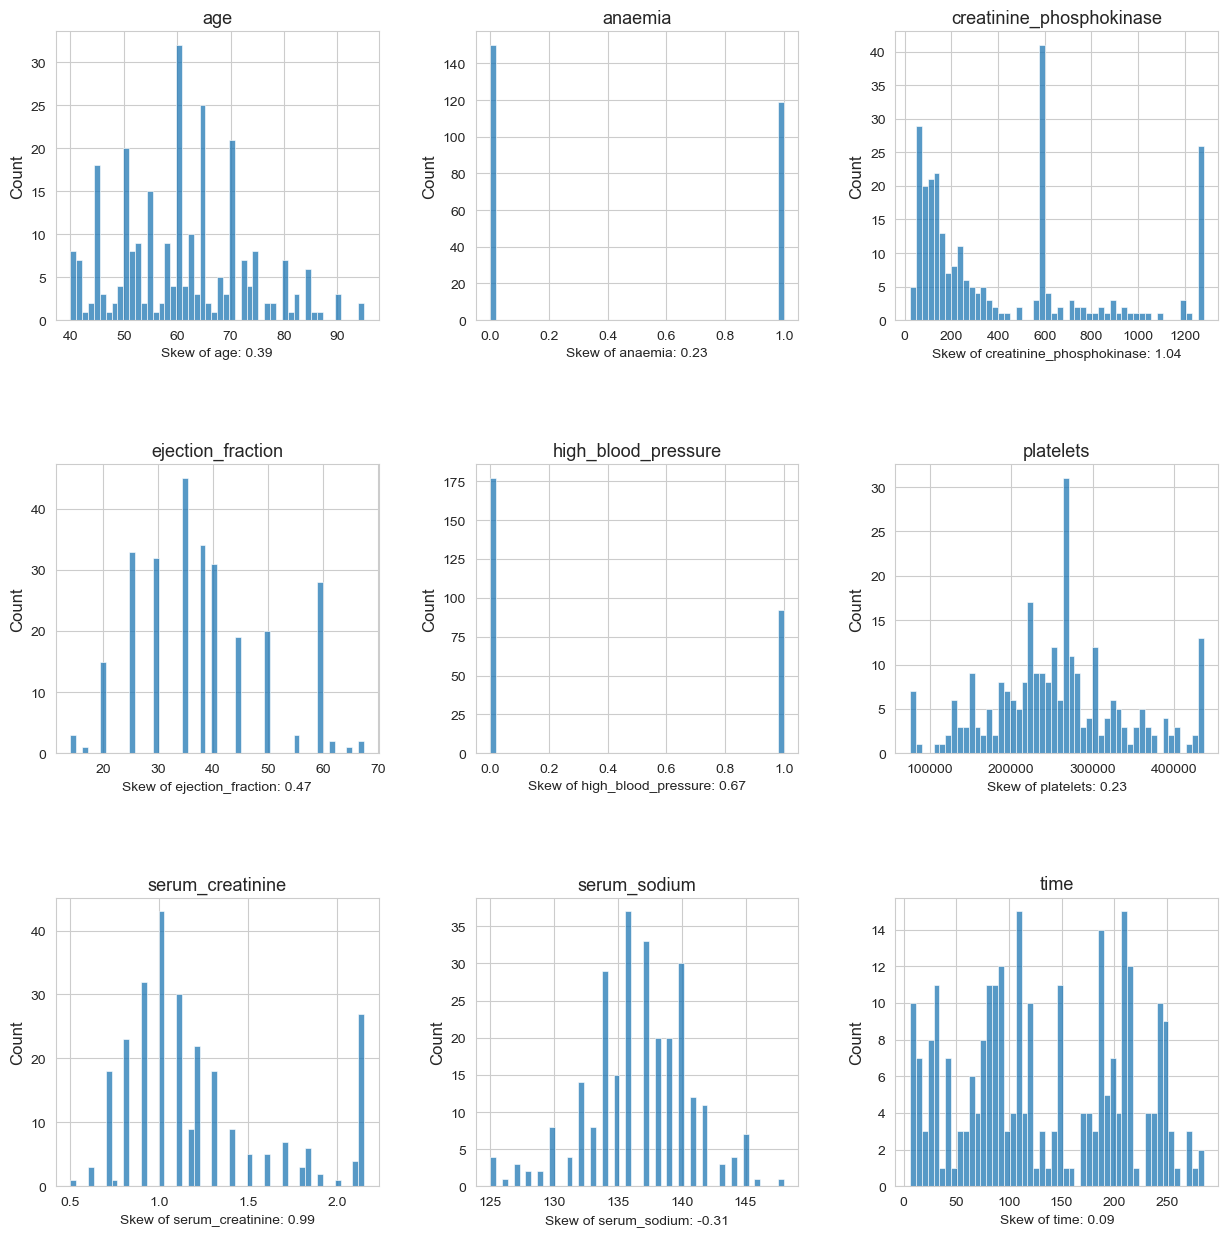

In [ ]:
from scipy.stats import skew

cols = X_train.columns.tolist()

plt.figure(figsize=(15, 15))

for i, col in enumerate(cols, 1):  # Start enumerate from 1
    plt.subplot(3, 3, i)
    plt.title(col, fontsize=13)
    plt.xlabel(f"Skew of {col}: {skew(X_train[col]):.2f}")
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=X_train, x=col, bins=50, palette=['red', 'green'])

plt.show()

<Figure size 1500x1500 with 0 Axes>

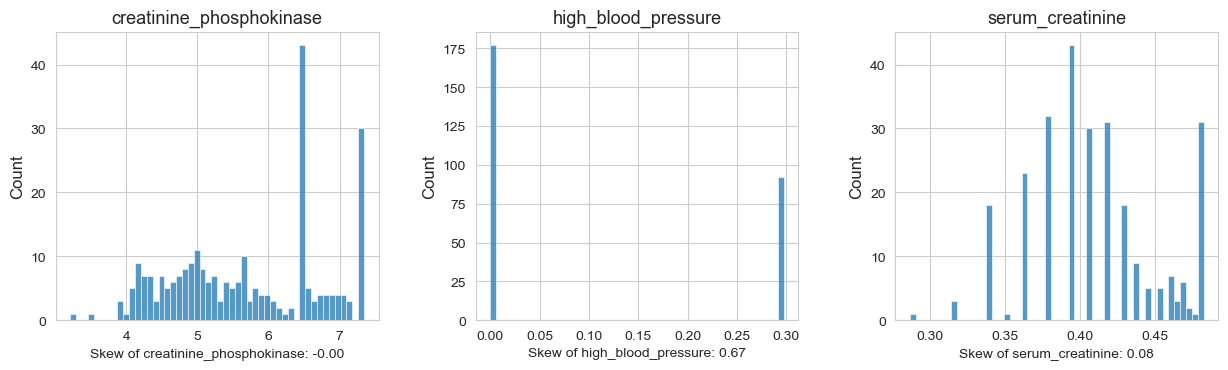

In [ ]:
from scipy.stats import boxcox, yeojohnson
kolom = ['creatinine_phosphokinase', 'high_blood_pressure', 'serum_creatinine']
plt.figure(figsize=(15,15))
plt.figure(figsize=(15, 15))

for i, col in enumerate(kolom, 1):  # Start enumerate from 1
    transformed_data, lambda_val = yeojohnson(X_train[col])
    X_train[col] = transformed_data

    plt.subplot(3, 3, i)
    plt.title(col, fontsize=13)
    plt.xlabel(f"Skew of {col}: {skew(X_train[col]):.2f}")
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=X_train, x=col, bins=50)

plt.show()

Menyamakan Jumlah Kolom X_Tain dan X_Test

In [ ]:
X_test

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
45   50.0        0                       582         1                 38   
83   79.0        1                        55         0                 50   
4    65.0        1                       160         1                 20   
76   70.0        0                        92         0                 60   
80   70.0        0                        69         0                 40   
115  58.0        1                       400         0                 40   
61   50.0        0                       318         0                 40   
272  67.0        0                       213         0                 38   
219  55.0        0                       582         1                 35   
101  75.0        0                       582         0                 45   
153  50.0        0                      1846         1                 35   
187  60.0        0                      1896         1                 25   
280  70.0        0                      2695         1                 40   
30   94.0        0                       582         1                 38   
254  53.0        1                       446         0                 60   
33   50.0        1                       159         1                 30   
0    75.0        0                       582         0                 20   
133  63.0        0                       193         0                 60   
292  52.0        0                       190         1                 38   
99   63.0        1                        61         1                 40   
63   45.0        0                       582         0                 35   
13   50.0        1                       168         0                 38   
3    50.0        1                       111         0                 20   
260  55.0        0                        66         0                 40   
210  70.0        0                       212         1                 17   
96   63.0        1                       514         1                 25   
286  60.0        0                       253         0                 35   
112  50.0        0                       369         1                 25   
148  75.0        1                       582         0                 30   
47   60.0        0                       582         1                 38   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
45                     0  310000.00              1.90           135    1   
83                     1  172000.00              1.80           133    1   
4                      0  327000.00              2.70           116    0   
76                     1  317000.00              0.80           140    0   
80                     0  293000.00              1.70           136    0   
115                    0  164000.00              1.00           139    0   
61                     1  216000.00              2.30           131    0   
272                    0  215000.00              1.20           133    0   
219                    1  371000.00              0.70           140    0   
101                    1  263358.03              1.18           137    1   
153                    0  263358.03              1.18           137    1   
187                    0  365000.00              2.10           144    0   
280                    0  241000.00              1.00           137    1   
30                     1  263358.03              1.83           134    1   
254                    1  263358.03              1.00           139    1   
33                     0  302000.00              1.20           138    0   
0                      1  265000.00              1.90           130    1   
133                    1  295000.00              1.30           145    1   
292                    0  382000.00              1.00           140    1   
99                     0  221000.00              1.10           140    0   
63                    

In [ ]:
X_test.drop(columns=['diabetes','smoking','sex'],axis=1, inplace=True)

In [ ]:
X_test

age  anaemia  creatinine_phosphokinase  ejection_fraction  \
45   50.0        0                       582                 38   
83   79.0        1                        55                 50   
4    65.0        1                       160                 20   
76   70.0        0                        92                 60   
80   70.0        0                        69                 40   
115  58.0        1                       400                 40   
61   50.0        0                       318                 40   
272  67.0        0                       213                 38   
219  55.0        0                       582                 35   
101  75.0        0                       582                 45   
153  50.0        0                      1846                 35   
187  60.0        0                      1896                 25   
280  70.0        0                      2695                 40   
30   94.0        0                       582                 38   
254  53.0        1                       446                 60   
33   50.0        1                       159                 30   
0    75.0        0                       582                 20   
133  63.0        0                       193                 60   
292  52.0        0                       190                 38   
99   63.0        1                        61                 40   
63   45.0        0                       582                 35   
13   50.0        1                       168                 38   
3    50.0        1                       111                 20   
260  55.0        0                        66                 40   
210  70.0        0                       212                 17   
96   63.0        1                       514                 25   
286  60.0        0                       253                 35   
112  50.0        0                       369                 25   
148  75.0        1                       582                 30   
47   60.0        0                       582                 38   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  time  
45                     0  310000.00              1.90           135    35  
83                     1  172000.00              1.80           133    78  
4                      0  327000.00              2.70           116     8  
76                     1  317000.00              0.80           140    74  
80                     0  293000.00              1.70           136    75  
115                    0  164000.00              1.00           139    91  
61                     1  216000.00              2.30           131    60  
272                    0  215000.00              1.20           133   245  
219                    1  371000.00              0.70           140   197  
101                    1  263358.03              1.18           137    87  
153                    0  263358.03              1.18           137   119  
187                    0  365000.00              2.10           144   172  
280                    0  241000.00              1.00           137   247  
30                     1  263358.03              1.83           134    27  
254                    1  263358.03              1.00           139   215  
33                     0  302000.00              1.20           138    29  
0                      1  265000.00              1.90           130     4  
133                    1  295000.00              1.30           145   107  
292                    0  382000.00              1.00           140   258  
99                     0  221000.00              1.10           140    86  
63                     0  385000.00              1.00           145    61  
13                     1  276000.00              1.10           137    11  
3                      0  210000.00              1.90           137     7  
260                    0  203000.00              1.00           138   233  
210                    1  38

In [ ]:
X_train.dropna()
X_test.dropna()

age  anaemia  creatinine_phosphokinase  ejection_fraction  \
45   50.0        0                       582                 38   
83   79.0        1                        55                 50   
4    65.0        1                       160                 20   
76   70.0        0                        92                 60   
80   70.0        0                        69                 40   
115  58.0        1                       400                 40   
61   50.0        0                       318                 40   
272  67.0        0                       213                 38   
219  55.0        0                       582                 35   
101  75.0        0                       582                 45   
153  50.0        0                      1846                 35   
187  60.0        0                      1896                 25   
280  70.0        0                      2695                 40   
30   94.0        0                       582                 38   
254  53.0        1                       446                 60   
33   50.0        1                       159                 30   
0    75.0        0                       582                 20   
133  63.0        0                       193                 60   
292  52.0        0                       190                 38   
99   63.0        1                        61                 40   
63   45.0        0                       582                 35   
13   50.0        1                       168                 38   
3    50.0        1                       111                 20   
260  55.0        0                        66                 40   
210  70.0        0                       212                 17   
96   63.0        1                       514                 25   
286  60.0        0                       253                 35   
112  50.0        0                       369                 25   
148  75.0        1                       582                 30   
47   60.0        0                       582                 38   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  time  
45                     0  310000.00              1.90           135    35  
83                     1  172000.00              1.80           133    78  
4                      0  327000.00              2.70           116     8  
76                     1  317000.00              0.80           140    74  
80                     0  293000.00              1.70           136    75  
115                    0  164000.00              1.00           139    91  
61                     1  216000.00              2.30           131    60  
272                    0  215000.00              1.20           133   245  
219                    1  371000.00              0.70           140   197  
101                    1  263358.03              1.18           137    87  
153                    0  263358.03              1.18           137   119  
187                    0  365000.00              2.10           144   172  
280                    0  241000.00              1.00           137   247  
30                     1  263358.03              1.83           134    27  
254                    1  263358.03              1.00           139   215  
33                     0  302000.00              1.20           138    29  
0                      1  265000.00              1.90           130     4  
133                    1  295000.00              1.30           145   107  
292                    0  382000.00              1.00           140   258  
99                     0  221000.00              1.10           140    86  
63                     0  385000.00              1.00           145    61  
13                     1  276000.00              1.10           137    11  
3                      0  210000.00              1.90           137     7  
260                    0  203000.00              1.00           138   233  
210                    1  38

Scaling Data

In [ ]:
# Membuat objek StandardScaler
scaler = StandardScaler()

# Menyesuaikan (fit) scaler dengan data dan melakukan transformasi
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Modeling Data**

In [ ]:
RF = RandomForestClassifier(n_estimators=15, random_state=42)
RF.fit(X_train, y_train)
ypred = RF.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,ypred))

Accuracy: 0.8666666666666667


In [ ]:
print("Random Forest Model")
print("-------------------------------------------------------------")
print("Precision:",metrics.precision_score(y_test,ypred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,ypred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,ypred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,ypred))
print (metrics.classification_report(y_test, ypred))
print("-------------------------------------------------------------")

Random Forest Model
-------------------------------------------------------------
Precision: 0.8947368421052632
Recall: 0.8947368421052632
F Score: 0.8947368421052632
Confusion Matrix:
 [[17  2]
 [ 2  9]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30

-------------------------------------------------------------


Pada modelling, kami menggunakan random forest classifier dan mendapatkan accuracy 86% tetapi terjadi imbalance.

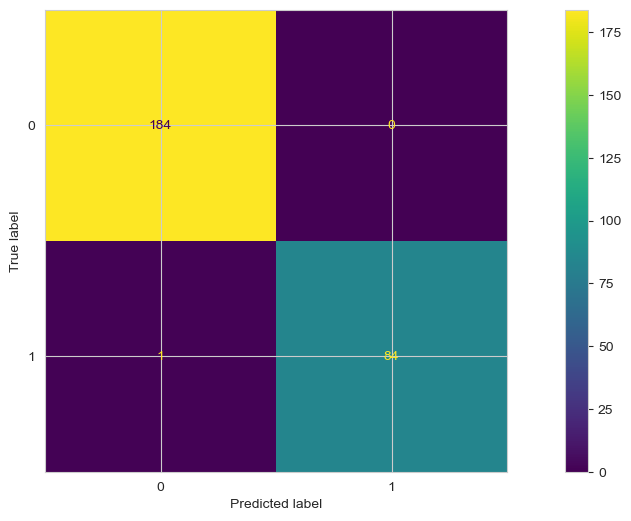

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(RF, X_train, y_train)

In [ ]:
print("Train Data Score: {}".format(RF.score(X_train, y_train)))
print("Test Data Score: {}".format(RF.score(X_test, y_test)))

Train Data Score: 0.9962825278810409
Test Data Score: 0.8666666666666667


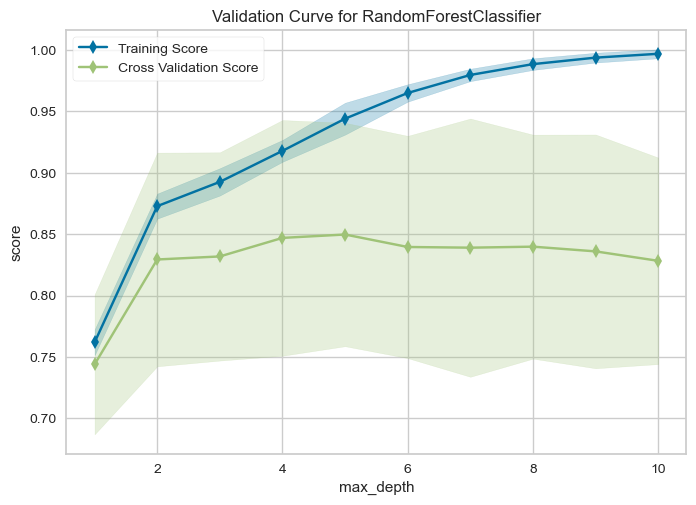

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=20,
                estimator=RandomForestClassifier(n_estimators=15,
                                                 random_state=42),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [ ]:
from yellowbrick.model_selection import validation_curve
print(validation_curve(RF, X_train, y_train, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=20, scoring="accuracy"))

Visualisasi diatas menunjukkan bahwa model tanpa melakukan proses handling imbalanced data mengalami underfitting

Handling imbalance dan modelling kembali

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Random Forest
RF_smote = RandomForestClassifier(n_estimators=15, random_state=42)
RF_smote.fit(X_smote, y_smote)
ypred_smote = RF_smote.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,ypred_smote))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,ypred_smote))
print (metrics.classification_report(y_test, ypred_smote))

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[15  4]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.71      0.91      0.80        11

    accuracy                           0.83        30
   macro avg       0.83      0.85      0.83        30
weighted avg       0.86      0.83      0.84        30



setelah melakukan handling imbalance model menjadi lebih balanace

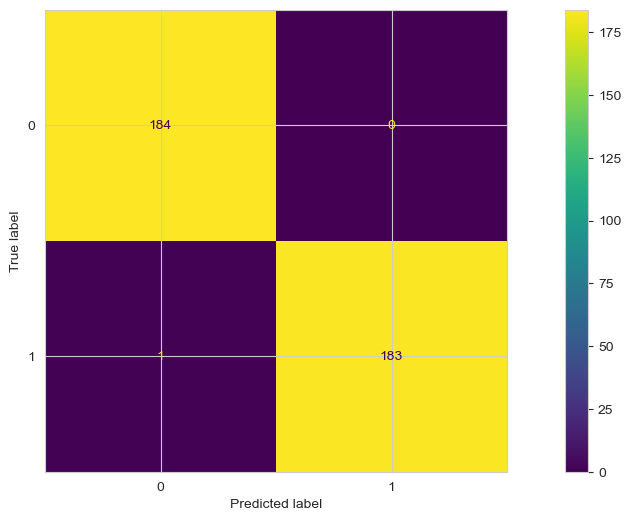

In [ ]:
ConfusionMatrixDisplay.from_estimator(RF_smote, X_smote, y_smote)

In [ ]:
print("Train Data Score: {}".format(RF_smote.score(X_smote, y_smote)))
print("Test Data Score: {}".format(RF_smote.score(X_test, y_test)))

Train Data Score: 0.9972826086956522
Test Data Score: 0.8333333333333334


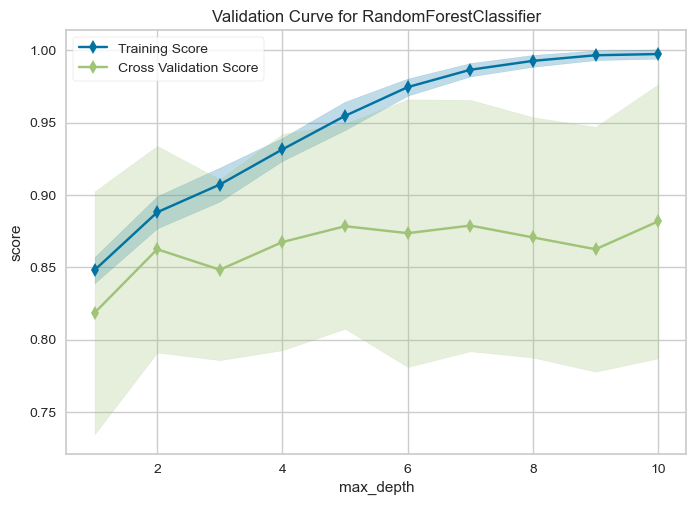

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=20,
                estimator=RandomForestClassifier(n_estimators=15,
                                                 random_state=42),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [ ]:
print(validation_curve(RF_smote, X_smote, y_smote, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=20, scoring="accuracy"))

Dapat dilihat bahwa training score dan cross validation score sudah tidak terlalu overfitting maupun underfitting.

## **CONCLUSION**

Dataset ini tidak terdapat missing values, nilai duplikat maupun invalid data. Pada variable target (DEATH_EVENT) mengalami ketidakseimbangan data dengan presentase data 31.60% status kematian dan 68.40% status masih hidup. Pada proses eksplorasi data, variabel time memiliki pengaruh yang cukup signifikan hal ini dikarenakan semakin tinggi waktu follow up (time) semakin rendah perkiraan pasien mengalami kejadian kematian. Usia dengan tingkat kejadian kematian tertinggi yaitu pada usia 60 tahun. Pada variabel binary seperti status anemia, diabetes, tekanan darah tinggi, gender dan merokok dihasilkan seperti berikut :

* pasien yang memiliki anemia tingkat kematian lebih tinggi daripada yang tidak.
* proporsi tingkat kematian orang yang memiliki diabetes atau tidak, tidak ada perbedaan yang signifikan bahkan cenderung sama yaitu pada presentase 32%
* untuk pasien dengan tekanan darah tinggi seperti yang telah diuraikan diatas, pasien yang memiliki darah tinggi memiliki tingkat kejadian kematian yang tinggi dibanding dengan pasien yang tidak memiliki.
* status sex tidak mempengaruhi tingkat status kematian secara signifikan terhadap kematian
* status pasien perokok atau tidak, juga tidak terlalu berpengaruh banyak terhadap kematian

dari pernyataan diatas dapat disimpulkan bahwa variabel diabetes, smoking, dan sex(gender) kurang berpengaruh secara signifikan terhadap kematian. maka dari itu variabel-variabel tersebut didrop. Setelah dilakukan scaling modeling menggunakan algoritma Random Forest didapatkan akurasi sebesar 87%. Pada tahap awal visualisasi data terlihat bahwa dataset mengalami ketidakseimbangan data pada variabel target, maka dari itu dilakukan percobaan menggunakan metode oversampling SMOTE untuk mendapatkan data yang seimbang. Setelah dilakukan precobaan oversampling dengan menggunakan algoritma yang sama yaitu Random Forest didapatkan akurasi sebesar 0.83 / 83%. Untuk perbandingan Precision, Recall, Fscore rata-rata nilai lebih bagus after oversampling.